In [1]:
!pip install upgrade statsmodels

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import *
from statsmodels import tsa
from statsmodels.graphics.tsaplots import *
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import default_rng

In [3]:
np.random.seed(42)

In [4]:
sns.set(rc={'figure.figsize':(30,10)})

In [5]:
soi = pd.read_csv('/kaggle/input/time-series-datasets/SOI.txt', delimiter = "\t")
pulsar = pd.read_csv('/kaggle/input/time-series-datasets/pulsar.txt', delimiter = "\t", header = None)
airlines = pd.read_csv('/kaggle/input/time-series-datasets/airlines.csv', header = None)

In [6]:
tsa.stattools.acf(soi['SINGAPOR'].fillna(0))

array([ 1.        ,  0.91628354,  0.7753502 ,  0.61317301,  0.44387498,
        0.27347778,  0.1024105 , -0.06043496, -0.1990878 , -0.32021242,
       -0.41633375, -0.48191397, -0.53070726, -0.55567495, -0.56130498,
       -0.54473441, -0.49564716, -0.43274912, -0.36308993, -0.2832169 ,
       -0.19556755, -0.09814803,  0.00142599,  0.10214483,  0.21212077,
        0.31349692,  0.39651042])

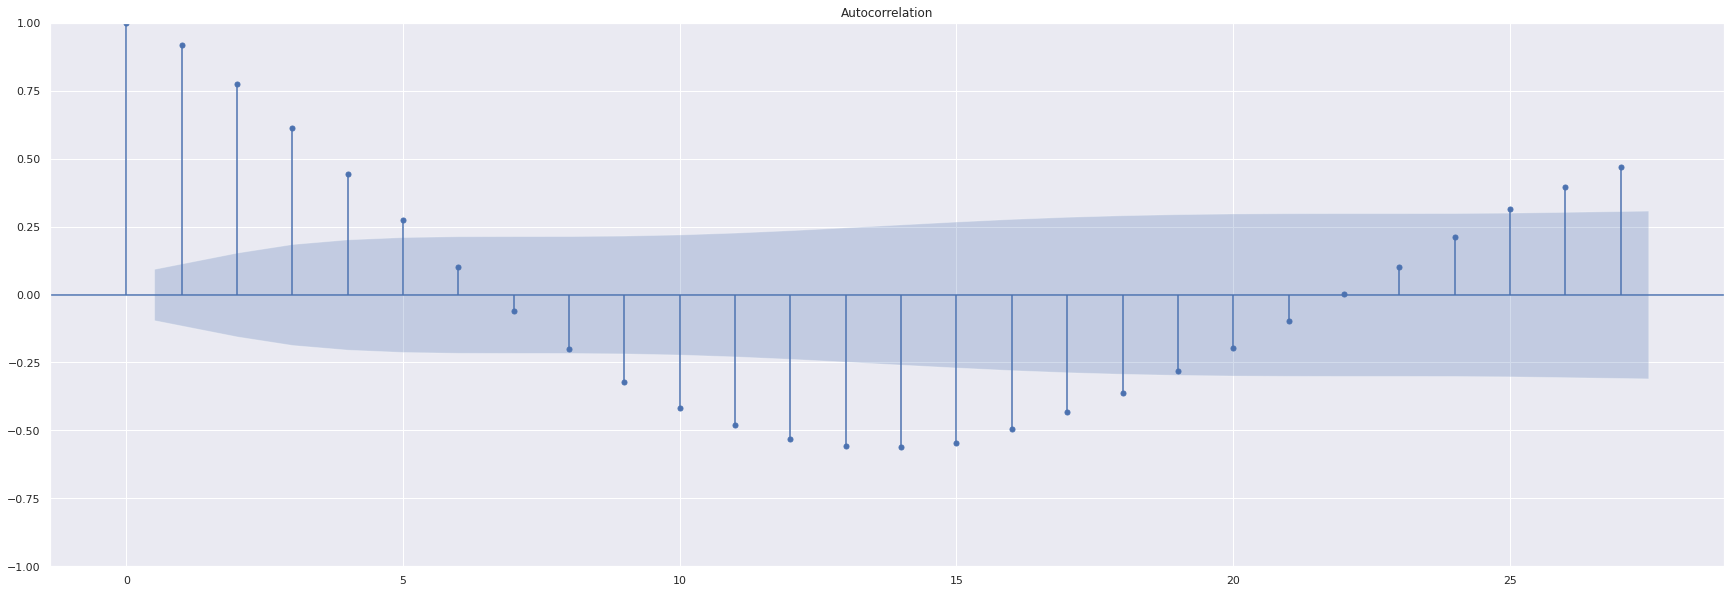

In [7]:
plot_acf(soi['SINGAPOR'].fillna(0))
plt.show()

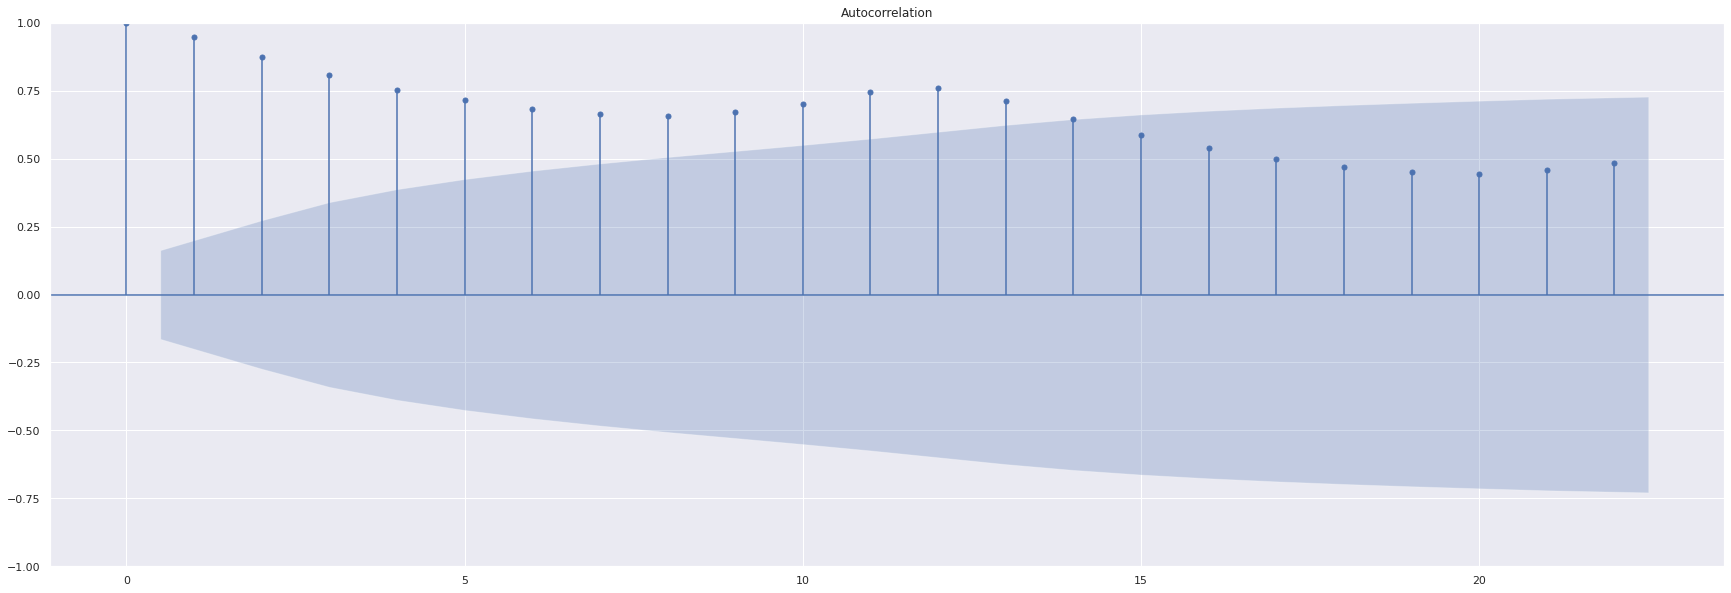

In [8]:
plot_acf(airlines)
plt.show()

<AxesSubplot:>

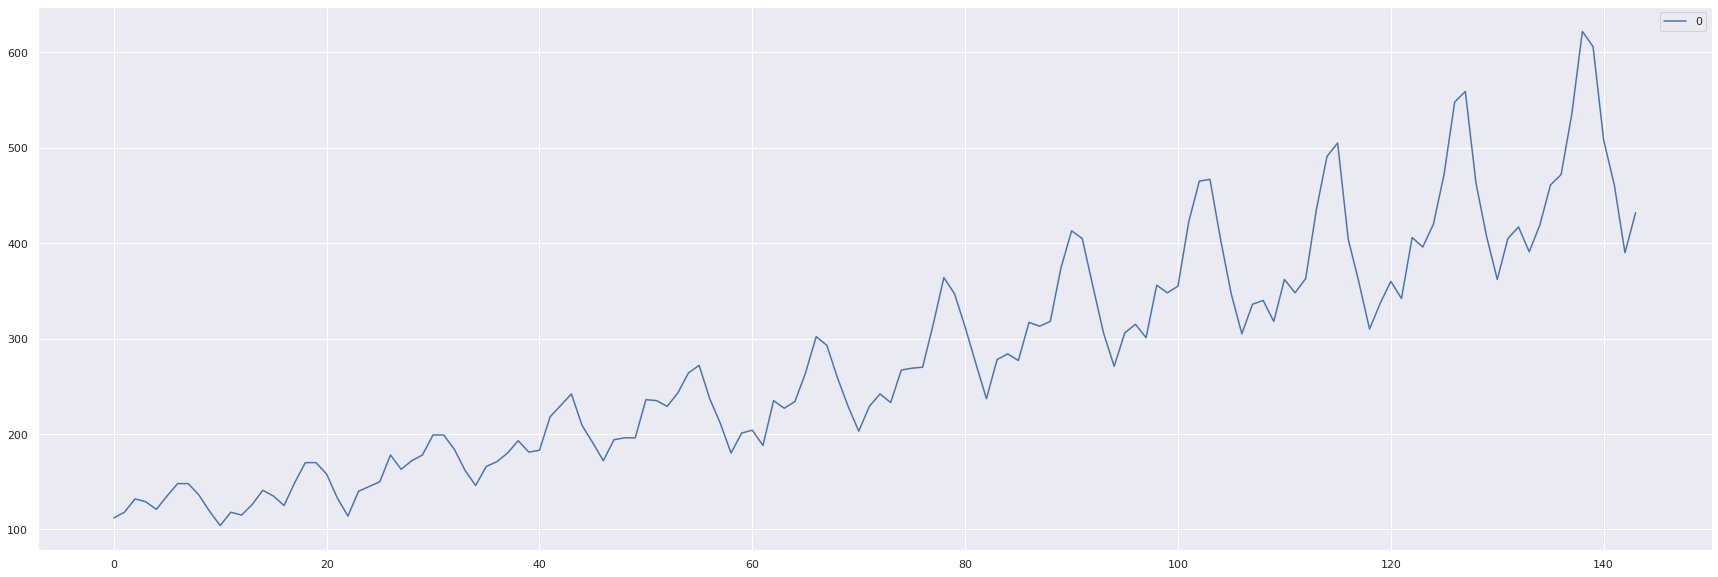

In [9]:
airlines.plot()

Autoregression AR(2) $X_t = c_1 X_{t-1} + c_2 X_{t-2} + W_{t}$

In [10]:
rng = default_rng()

In [11]:
def create_ar(p, coefs, time_points):
    """
    creates an Ar(p) process with coefficients coefs
    where coefs[i] is the multiplier of X[t-i]
    i.e. X[t] = c[1]*X[t-1] + c[2]*X[t-2] + ... + W[t]
    """
    X = rng.normal(size = p).tolist()
    time = np.arange(p, time_points)
    print(p)
    W = np.random.normal(0, scale = 1.0, size = (time_points,))
    for t in time:
        Xt = W[t]
        for i, c in enumerate(coefs):
            Xt += c*X[t-(i+1)]
        X.append(Xt)
    return np.array(X)

def create_ma(q, coefs, time_points):
    """
    creates an Ar(p) process with coefficients coefs
    where coefs[i] is the multiplier of X[t-i]
    i.e. X[t] = c[1]*X[t-1] + c[2]*X[t-2] + ... + W[t]
    """
    X = rng.normal(size = q).tolist()
    time = np.arange(0, time_points)
    W = np.random.normal(0, scale = 1.0, size = (time_points,))
    for t in time:
        Xt = W[t]
        for i, c in enumerate(coefs):
            Xt += c*W[t-(i+1)]
        X.append(Xt)
    return np.array(X)
            
    
def create_arma(p, q, phis, thetas, time_points):
    X = rng.normal(size = max(p,q)).tolist()
    time = np.arange(0, time_points)
    W = np.random.normal(0, scale = 1.0, size = (time_points,))
    for t in time:
        Xt = W[t]
        for i in range(q):
            Xt += thetas[i]*W[t-(i+1)]
        for i in range(p):
            Xt += phis[i]*X[t-(i+1)]
        X.append(Xt)
        
    return np.array(X)
    
            

In [12]:
X = create_ar(3, [0.7, 0.4, -0.3], 1000)
pacf(X)

3


array([ 1.        ,  0.80534299,  0.19800804, -0.27860706, -0.02891668,
        0.05654265, -0.00258811, -0.00523494, -0.01253712,  0.06133274,
       -0.00207268, -0.02620607, -0.02239496, -0.01321219, -0.00346042,
       -0.00342342,  0.00858507, -0.022535  ,  0.01018964, -0.01593334,
       -0.01567341,  0.06306376,  0.04320728, -0.02224635, -0.03225688,
        0.00565967,  0.04786824, -0.00303954, -0.03245721,  0.00207667,
       -0.01809747])

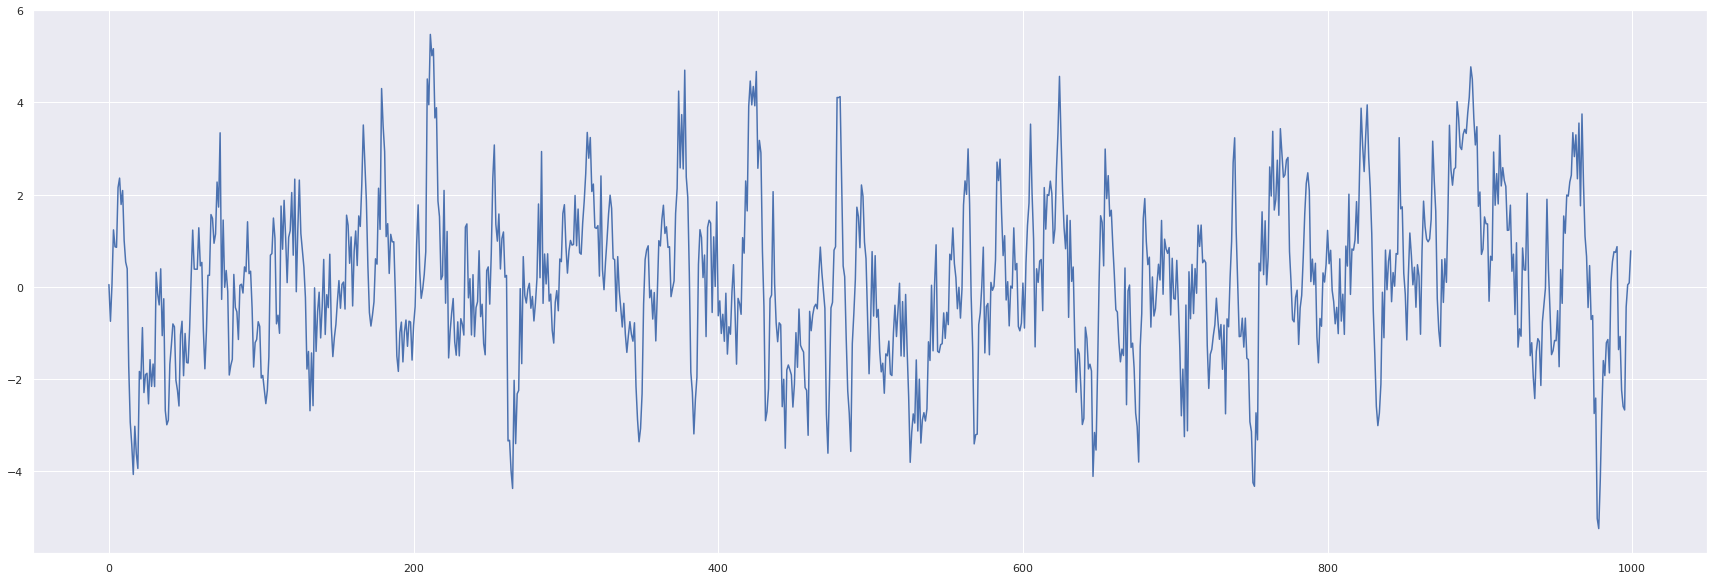

In [13]:
plt.plot(X)

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


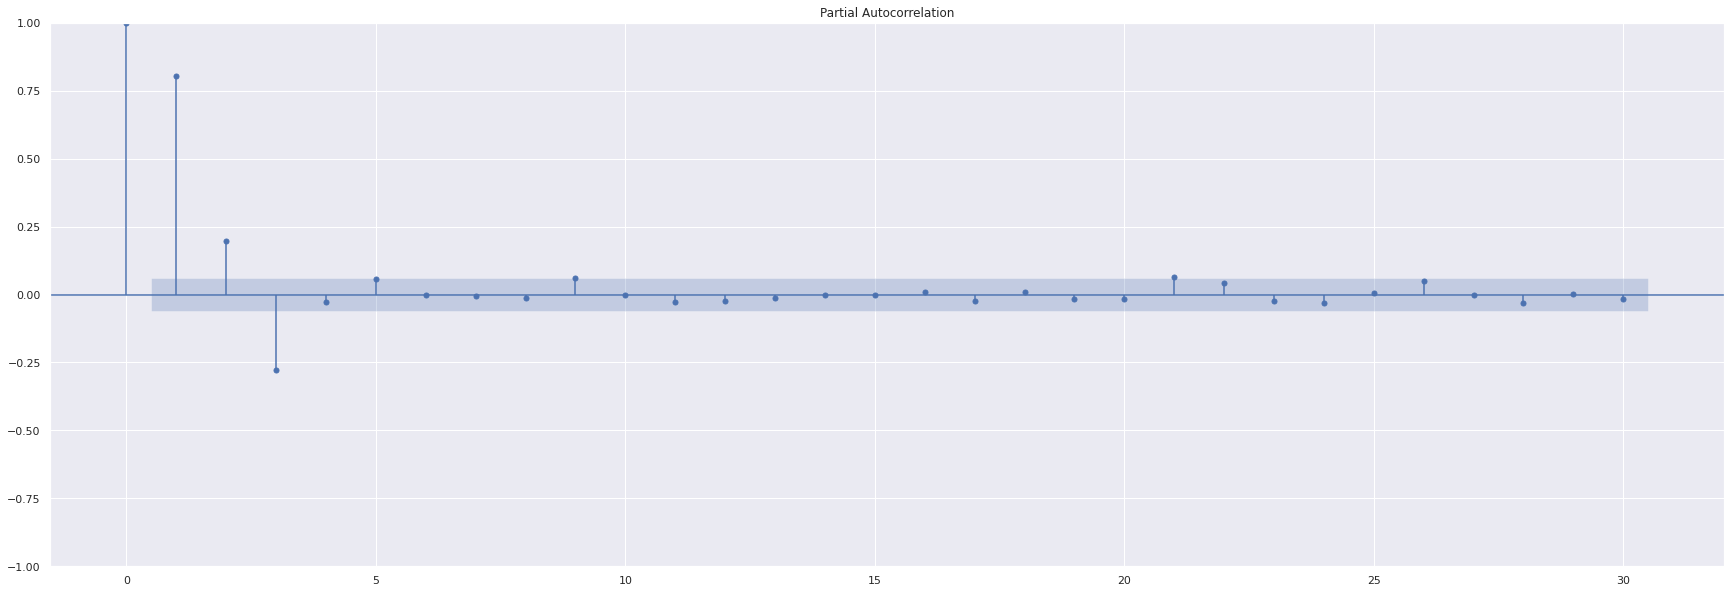

In [14]:
plot_pacf(X)
plt.show()

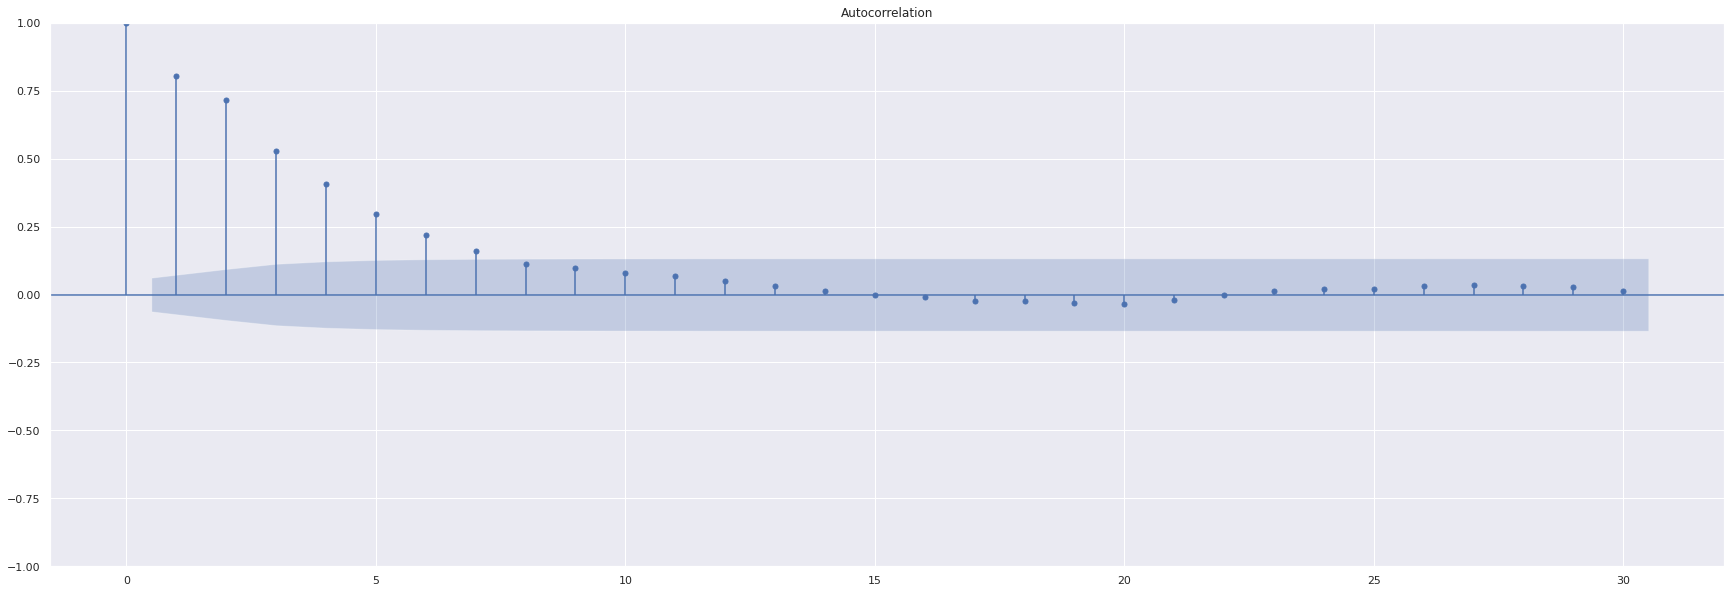

In [15]:
plot_acf(X)
plt.show()

In [16]:
coefs = [0.7, 0.4, -.3]

In [17]:
X = create_ma(3, coefs, 1000)
pacf(X)

array([ 1.00000000e+00,  4.93501033e-01, -1.75518360e-01, -1.86669414e-01,
        2.51442191e-01, -1.68160048e-01, -6.41408656e-02,  1.34572328e-01,
       -1.27197723e-01,  4.92423361e-02,  8.87311580e-02, -1.09473361e-01,
        2.67889393e-02,  7.41091206e-04, -7.74304633e-02,  2.65943990e-02,
        4.49192404e-02, -5.90993086e-02,  4.88104856e-02, -3.75861306e-02,
       -2.38819864e-02,  8.99755001e-02, -1.90790816e-02, -3.75091182e-02,
        2.14433963e-02,  1.02624746e-02,  4.53345269e-02, -7.19116429e-03,
        1.96701390e-02,  5.40650079e-02,  2.87483143e-02])

Text(0.5, 1.0, 'MA(3) [0.7, 0.4, -0.3]')

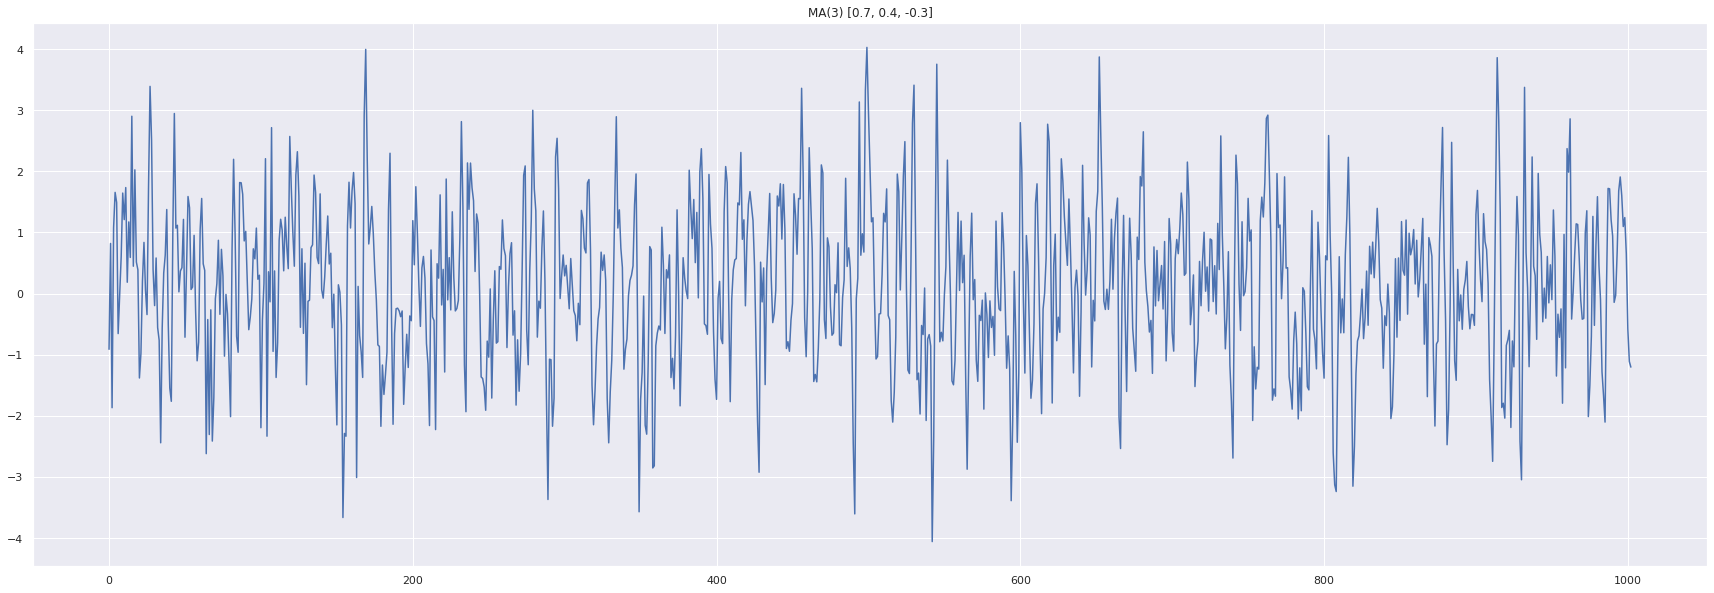

In [18]:
plt.plot(X)
plt.title(f"MA(3) {coefs}")

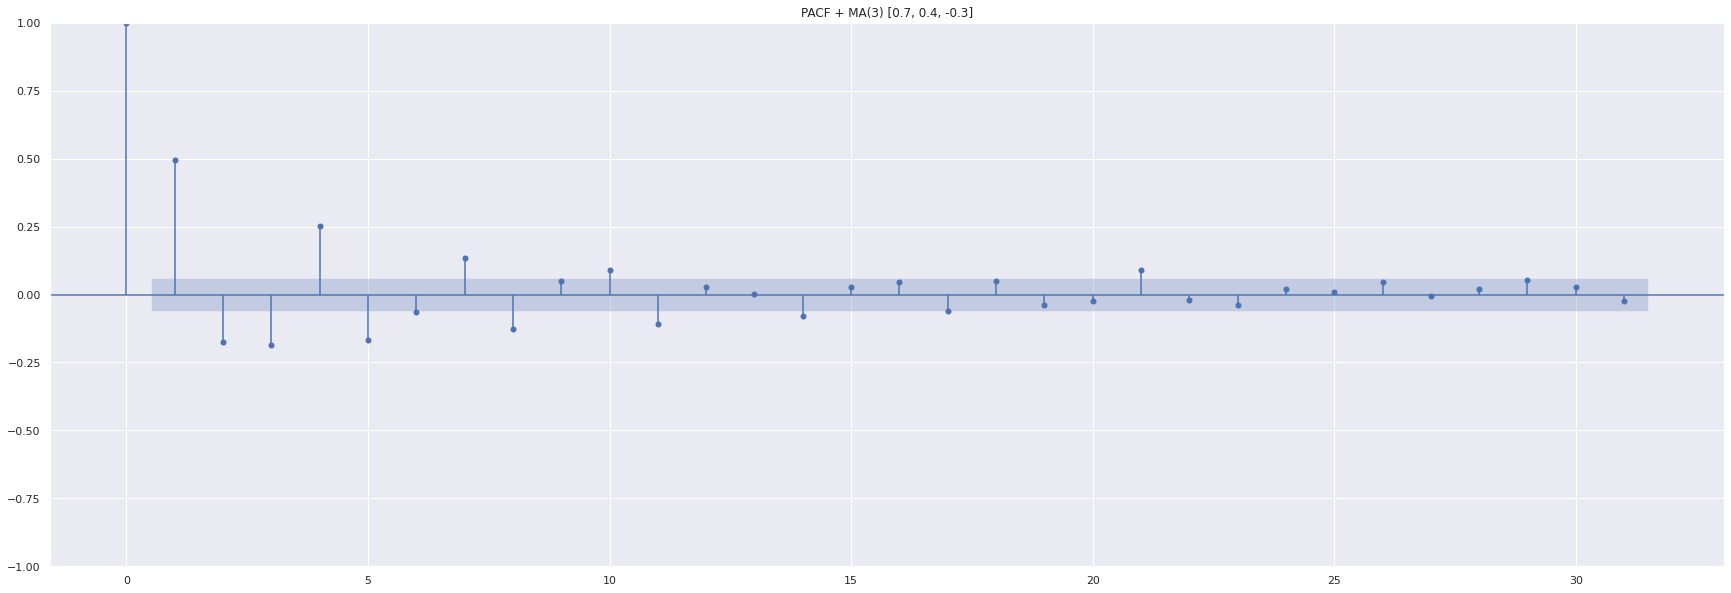

In [19]:
plot_pacf(X)
plt.title(f"PACF + MA(3) {coefs}")
plt.show()

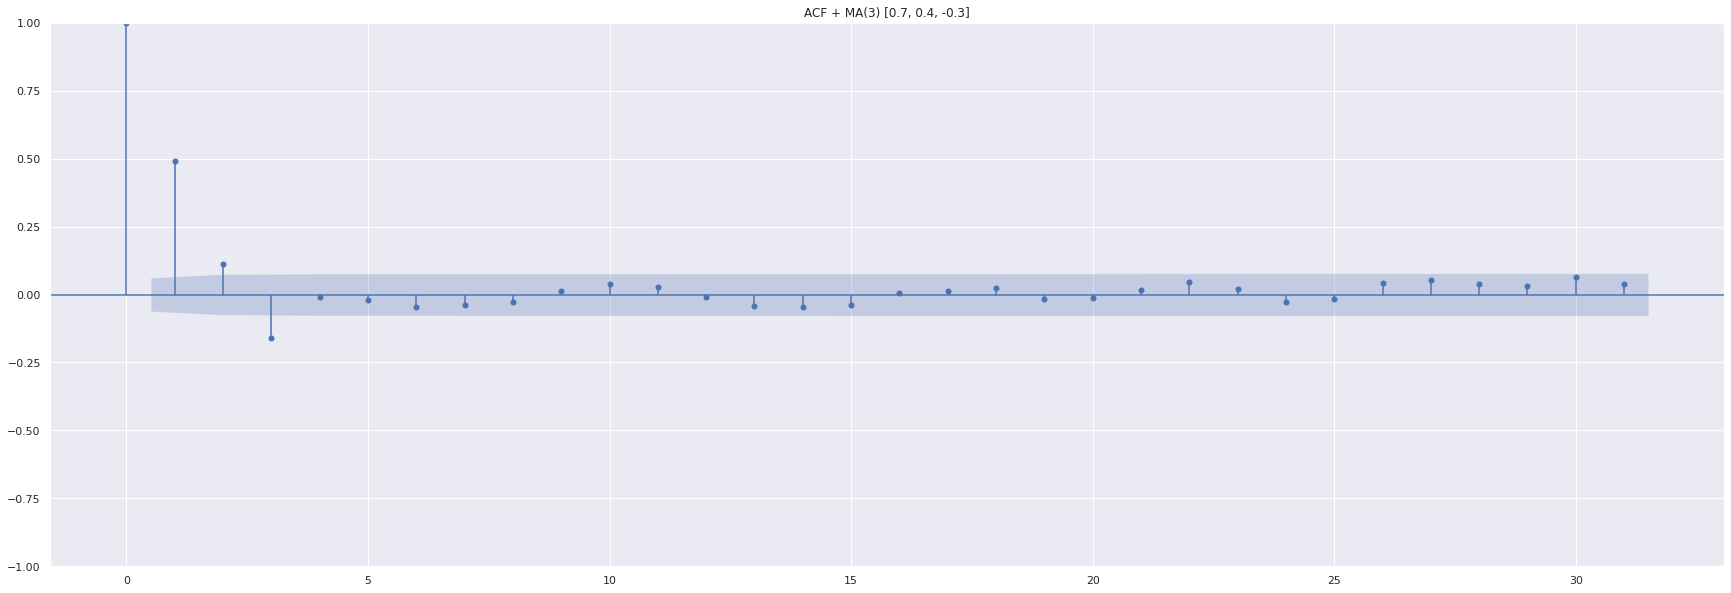

In [20]:
plot_acf(X)
plt.title(f"ACF + MA(3) {coefs}")
plt.show()

[ 1.00000000e+00  4.54716312e-01 -3.00707214e-01  1.79426313e-01
 -1.05382885e-01  1.16990919e-01 -5.18867329e-02  4.64890436e-02
 -4.14521802e-02  2.58469578e-02  1.21355736e-03  5.52967594e-04
 -5.38482806e-02  7.27004426e-02  1.01649494e-02  2.98947487e-02
  1.11575602e-02 -3.61318508e-02 -1.11172294e-02 -1.50101015e-02
  2.46609523e-02 -4.40764971e-02  1.75866103e-02 -3.81070552e-02
  9.04017660e-02  2.48117357e-03 -7.23473643e-03 -6.15864899e-02
 -1.16647057e-02  2.22488810e-02 -5.58214433e-03]


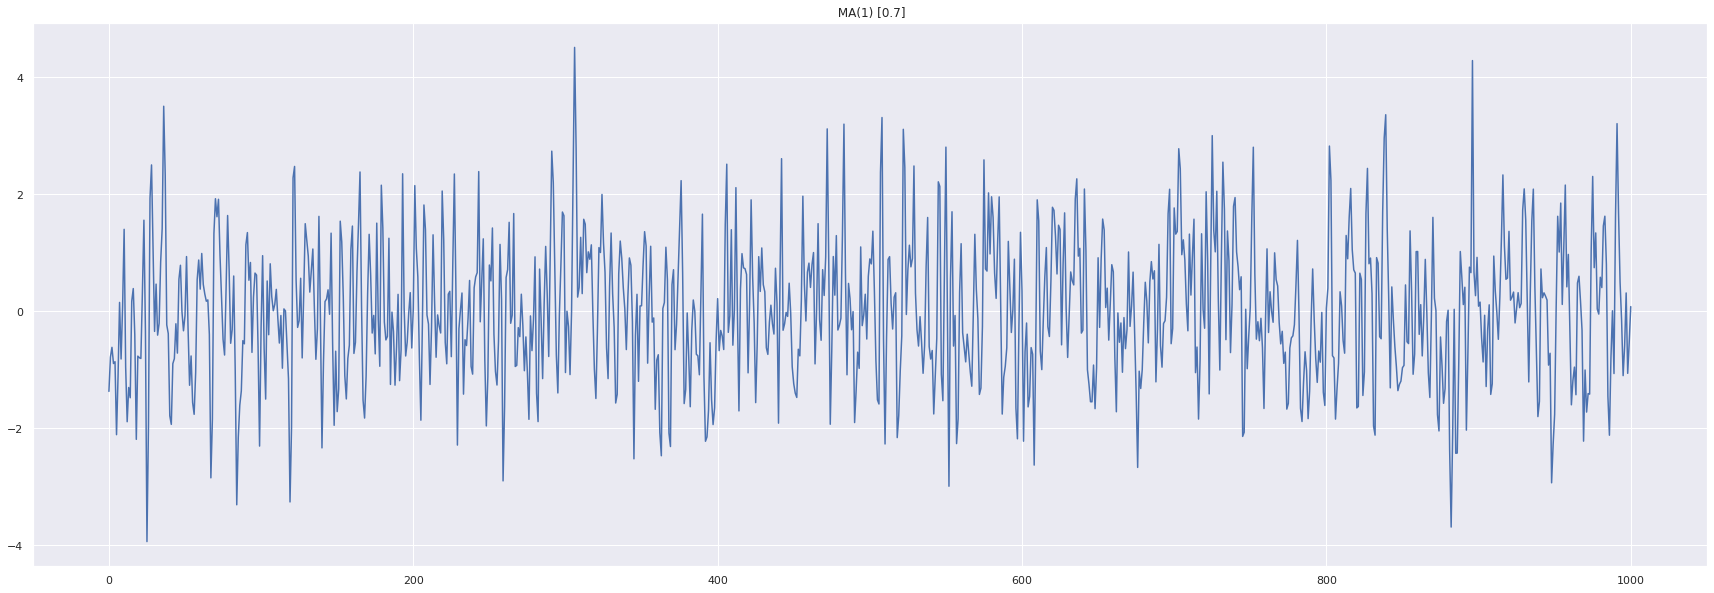

In [21]:
coefs = [0.7]
X = create_ma(1, coefs, 1000)
print(pacf(X))
plt.title(f" MA(1) {coefs}")
plt.plot(X)

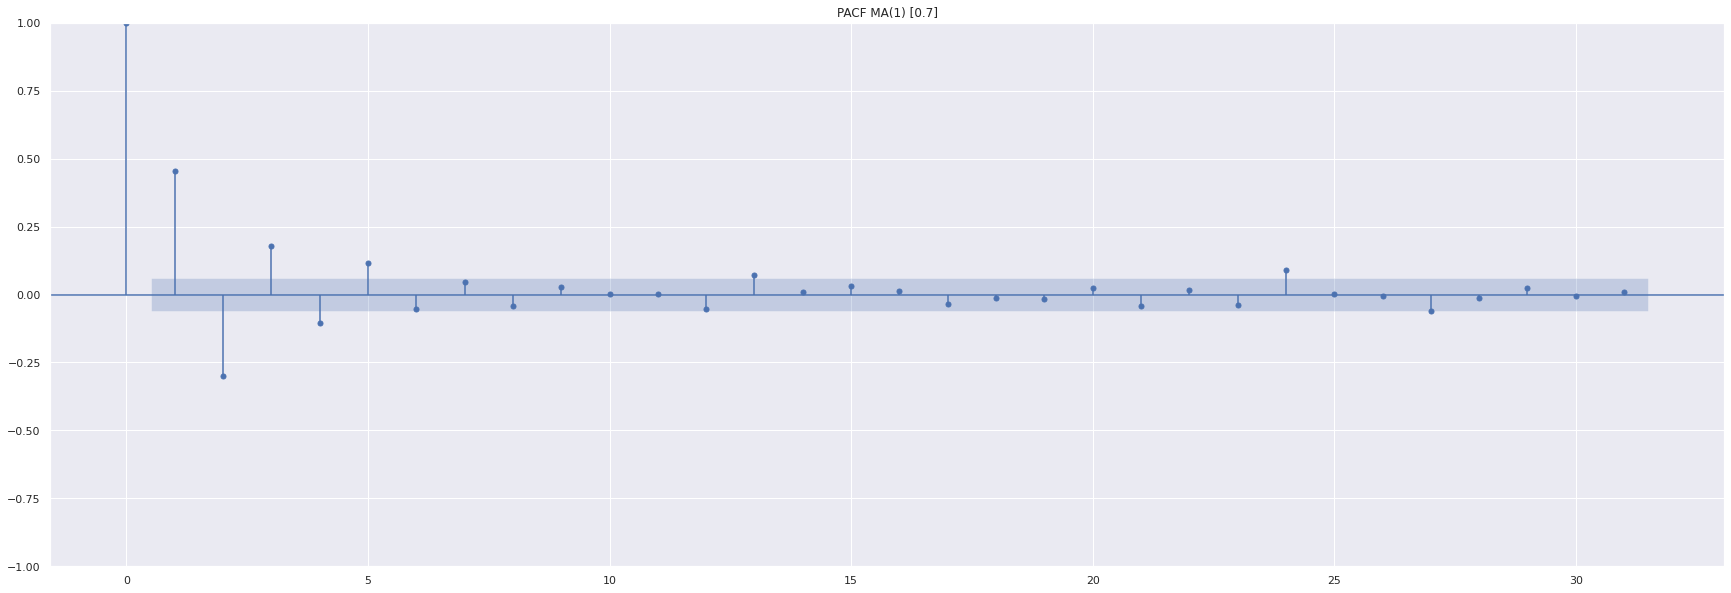

In [22]:
plot_pacf(X)
plt.title(f"PACF MA(1) {coefs}")
plt.show()

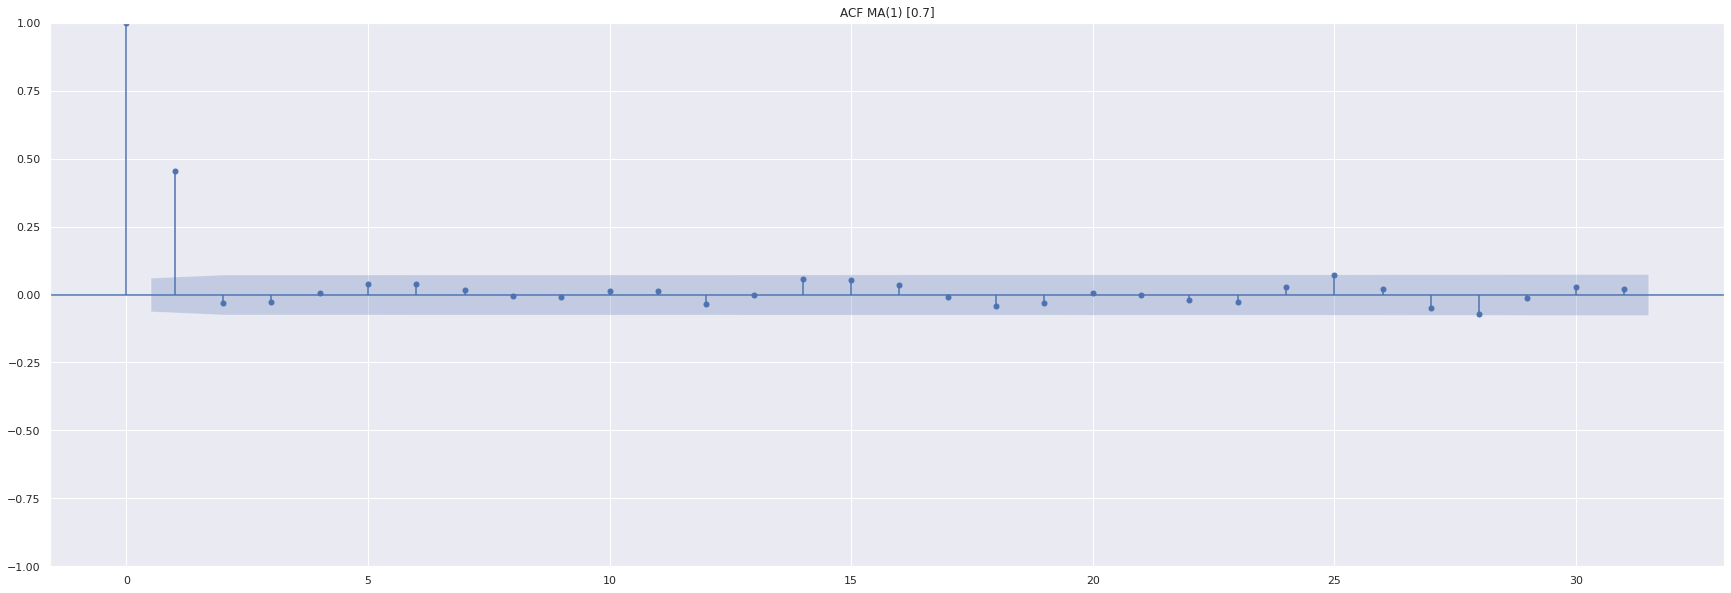

In [23]:
plot_acf(X)
plt.title(f"ACF MA(1) {coefs}")
plt.show()

1
[ 1.          0.67944621  0.00419019  0.03838969  0.05769064 -0.01097281
 -0.01252685  0.01762862 -0.01280957 -0.02963645 -0.02252152  0.048034
 -0.00749271 -0.02267502  0.0526074  -0.0096373  -0.00162311 -0.01333026
 -0.0113363   0.03530212  0.05540217 -0.00568682  0.03713527  0.02320436
 -0.02728671  0.01072625  0.02694759  0.03714368  0.02150216  0.04657898
  0.01997343]


Text(0.5, 1.0, 'AR(1), [0.7]')

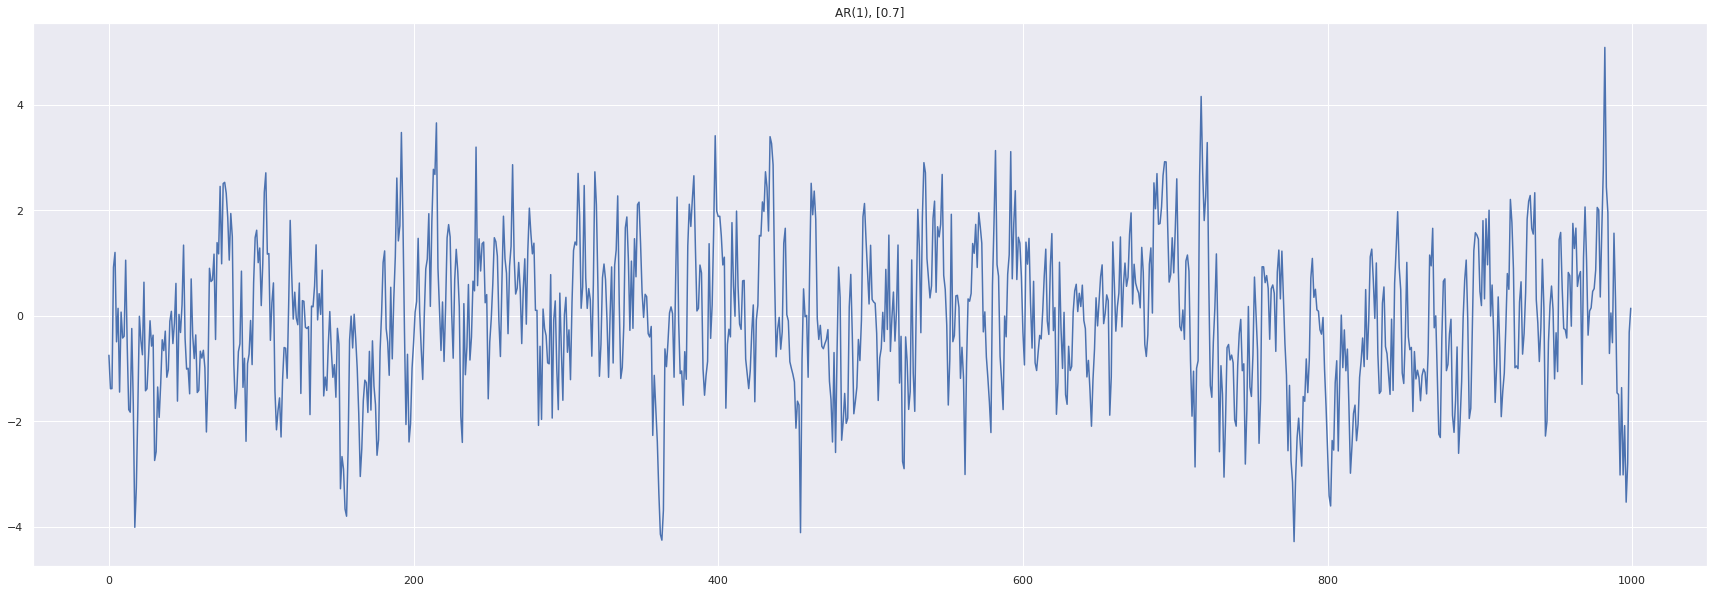

In [24]:
X = create_ar(1, coefs, 1000)
print(pacf(X))
plt.plot(X)
plt.title(f"AR(1), {coefs}")

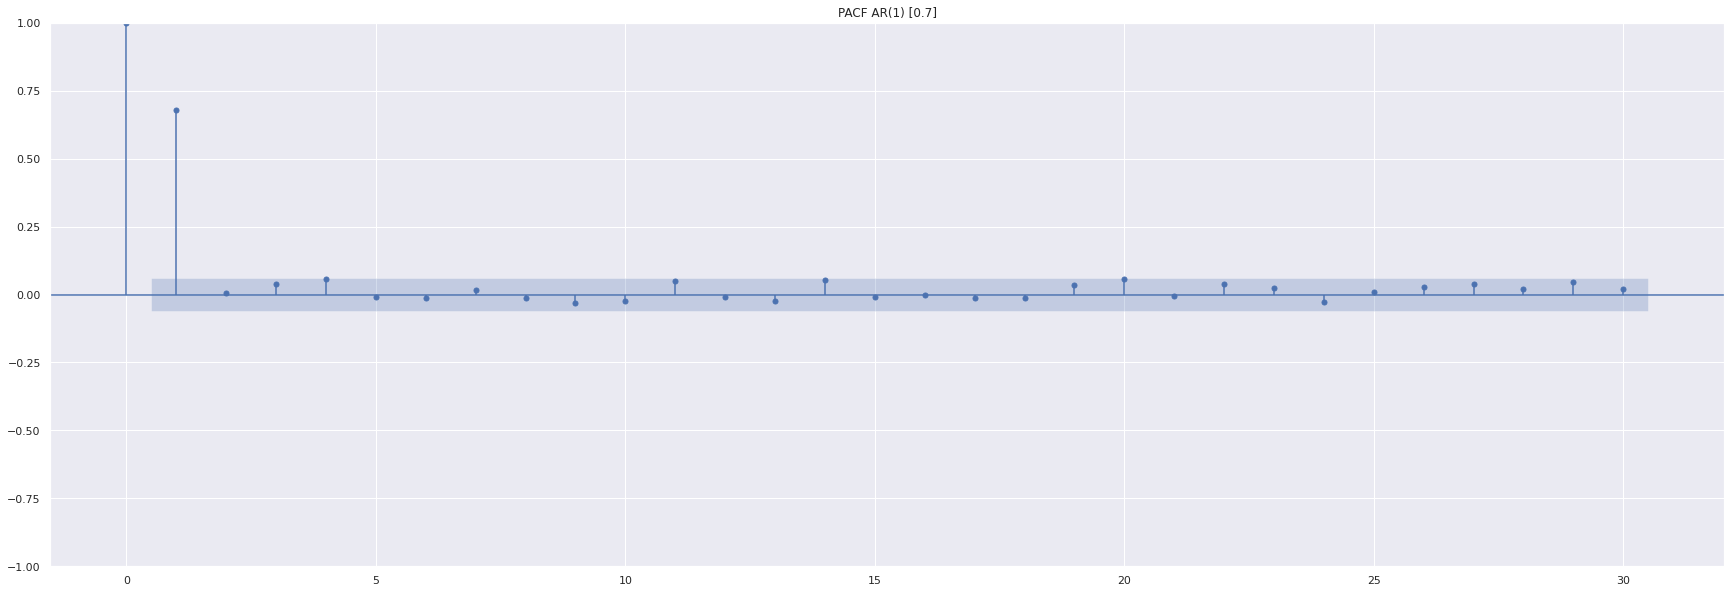

In [25]:
plot_pacf(X)
plt.title(f"PACF AR(1) {coefs}")
plt.show()

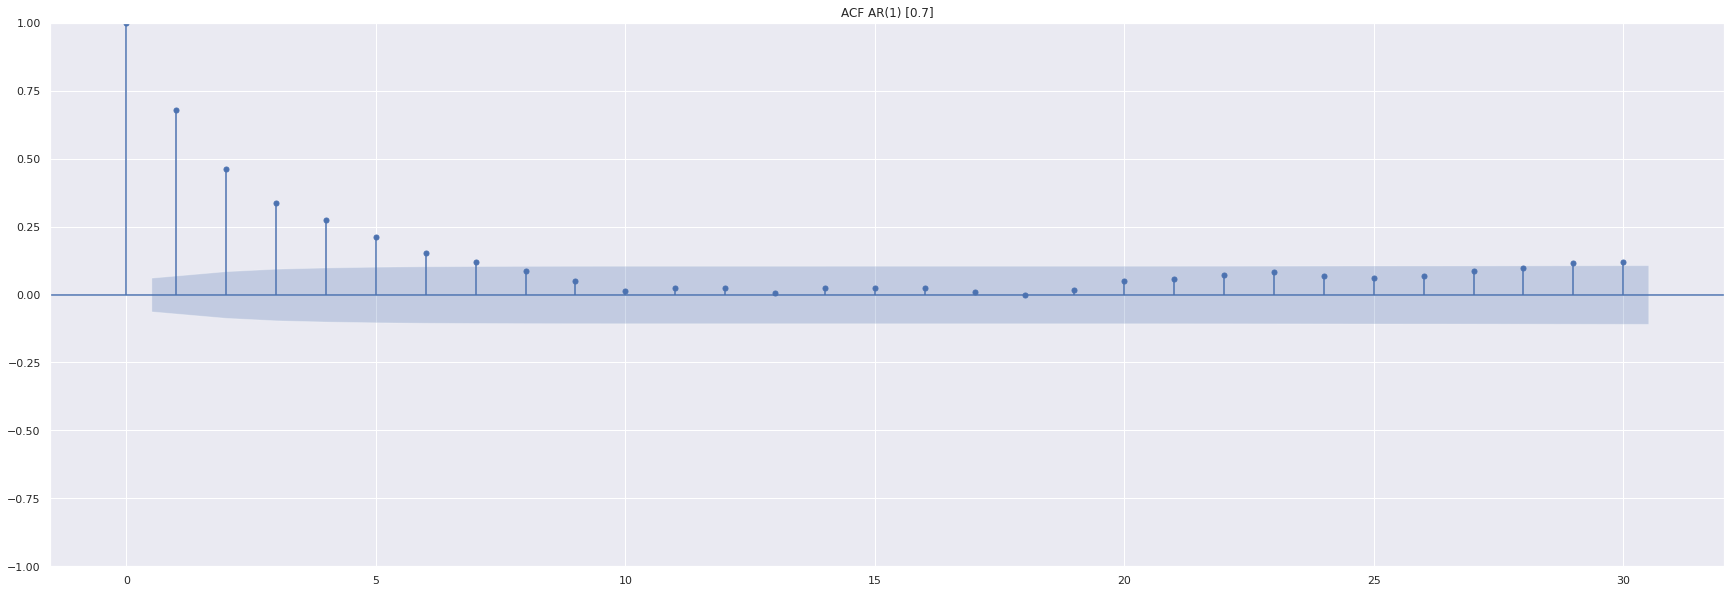

In [26]:
plot_acf(X)
plt.title(f"ACF AR(1) {coefs}")
plt.show()

1
[ 1.00000000e+00 -7.22482516e-01  6.58039815e-03  1.67105210e-02
 -2.47925439e-02 -4.03465249e-04 -4.35677827e-02  2.55799217e-02
 -4.50929388e-02  5.37974834e-03 -2.71926087e-02  2.86464651e-02
  1.86897382e-02  2.72024148e-02  2.35100886e-03  4.16608630e-03
  2.73312319e-02 -4.30705894e-02  1.65986497e-02  2.50446281e-03
  1.63763946e-02 -4.45714206e-02 -2.78628748e-02 -3.79436895e-02
 -3.14611909e-02  1.16934100e-02  4.05725902e-04  4.18758720e-02
  4.46333342e-02 -3.58013448e-03 -4.90150338e-02]


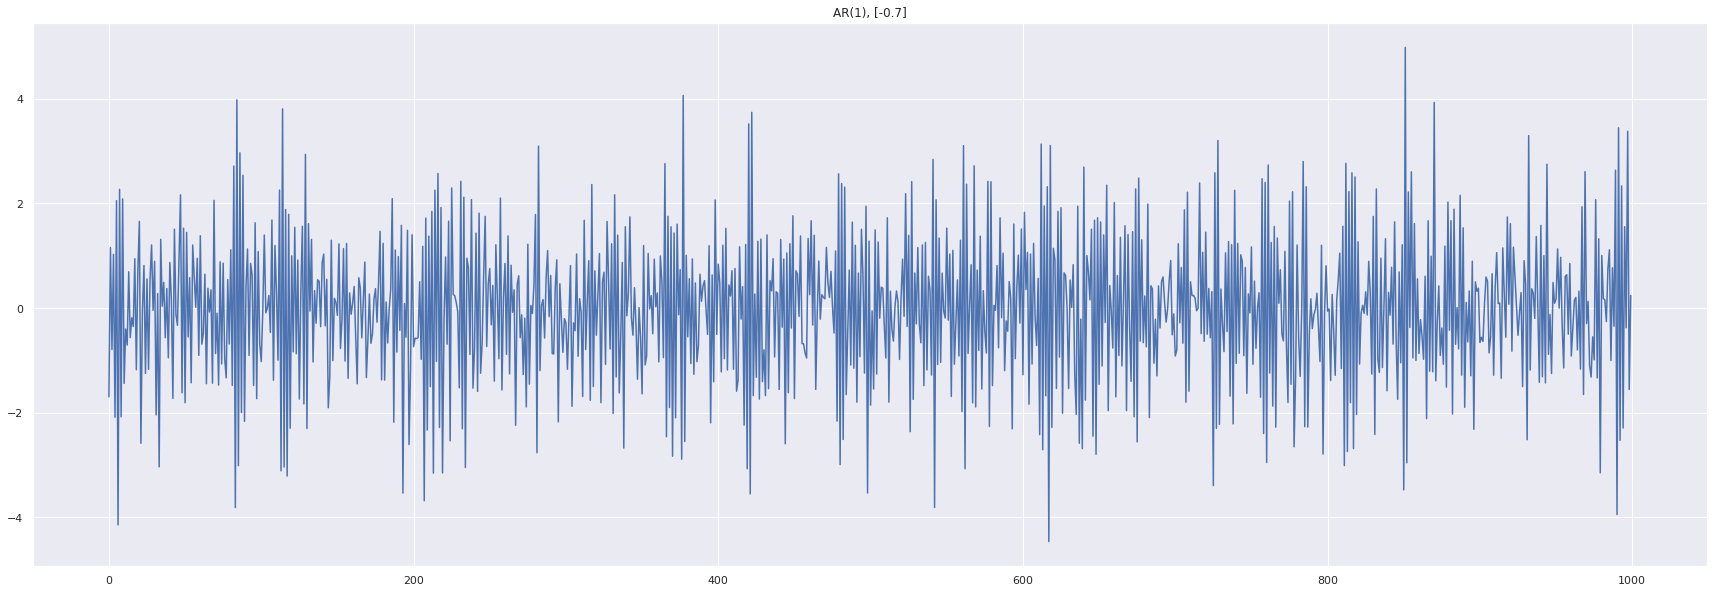

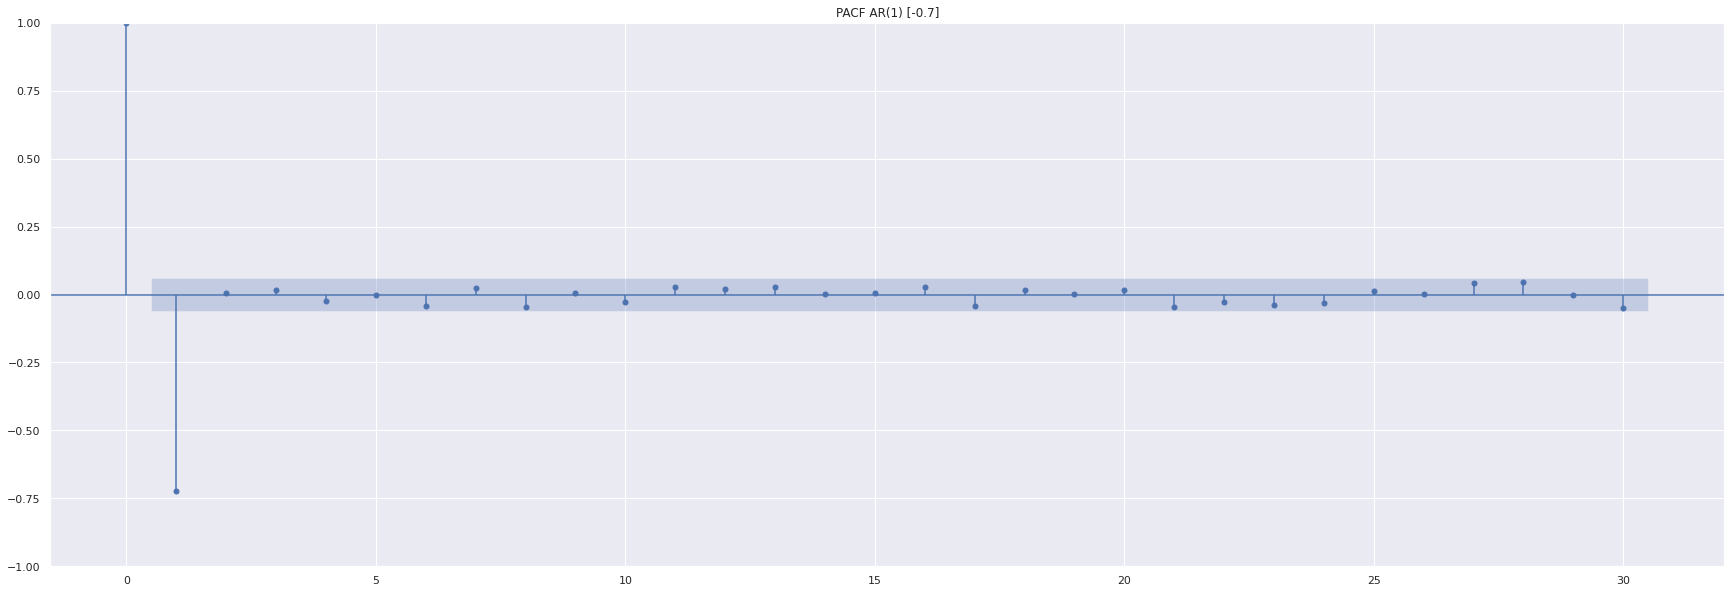

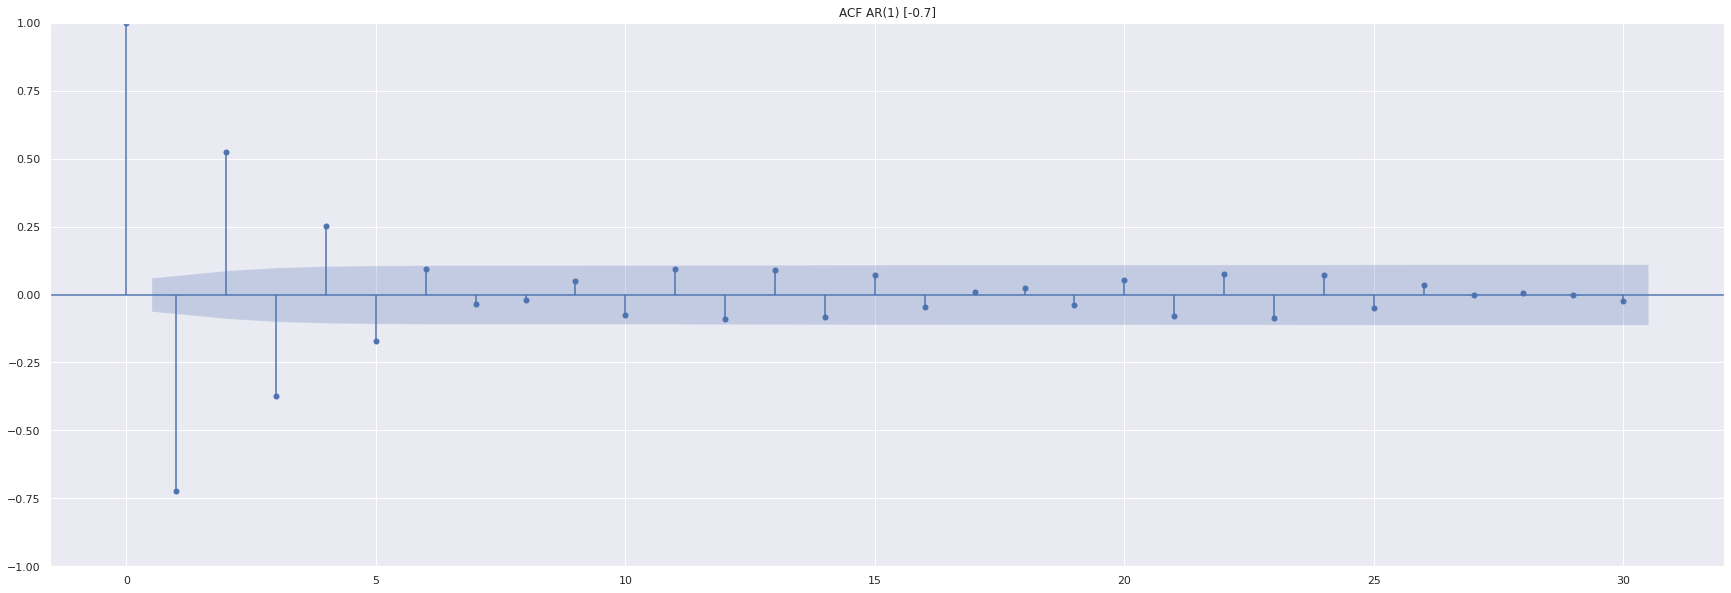

In [27]:
coefs = [-0.7]
X = create_ar(1, coefs, 1000)
print(pacf(X))
plt.plot(X)
plt.title(f"AR(1), {coefs}")
plot_pacf(X)
plt.title(f"PACF AR(1) {coefs}")
plt.show()
plot_acf(X)
plt.title(f"ACF AR(1) {coefs}")
plt.show()

[ 1.00000000e+00  4.14791297e-01 -3.38098419e-01  1.83392312e-01
 -1.51475106e-01  6.17702592e-03 -5.78680929e-02  1.56206411e-01
 -1.00243186e-01  4.12886556e-02 -4.41674295e-02 -4.14537544e-02
 -1.40004275e-01  5.78662689e-02  6.88243394e-03  9.25452889e-04
  2.56589712e-02  2.21395083e-02 -8.41807430e-02 -3.14694685e-02
  7.82411587e-02 -8.27423207e-02 -9.55604711e-02 -2.02463783e-02
  7.92369255e-02]


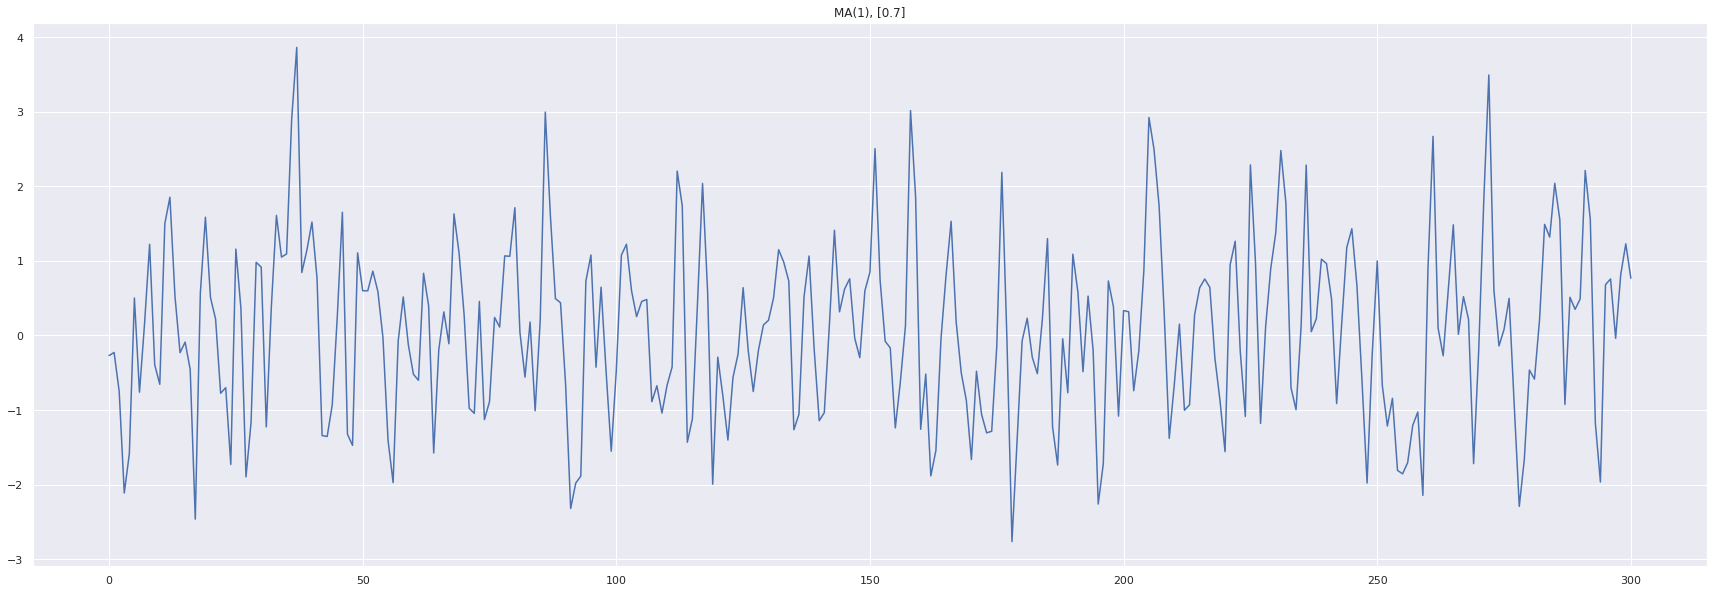

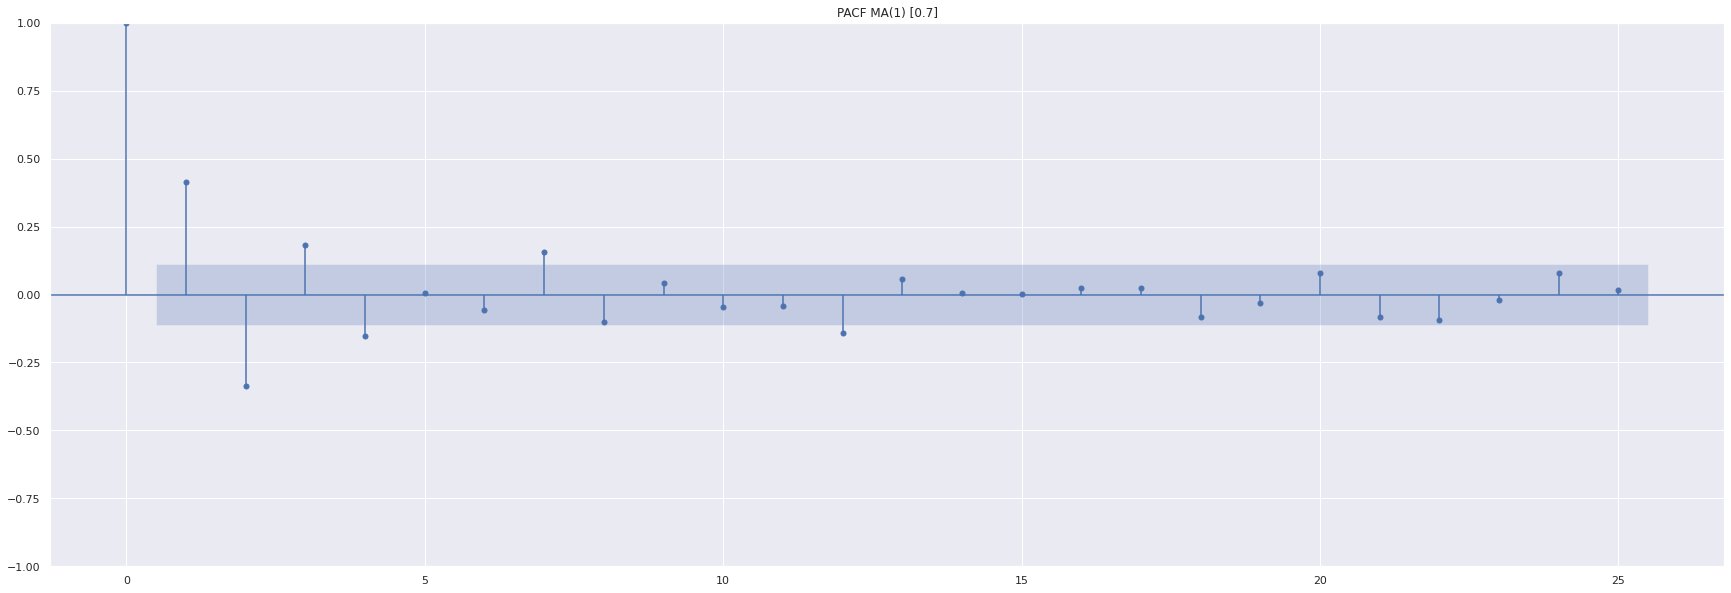

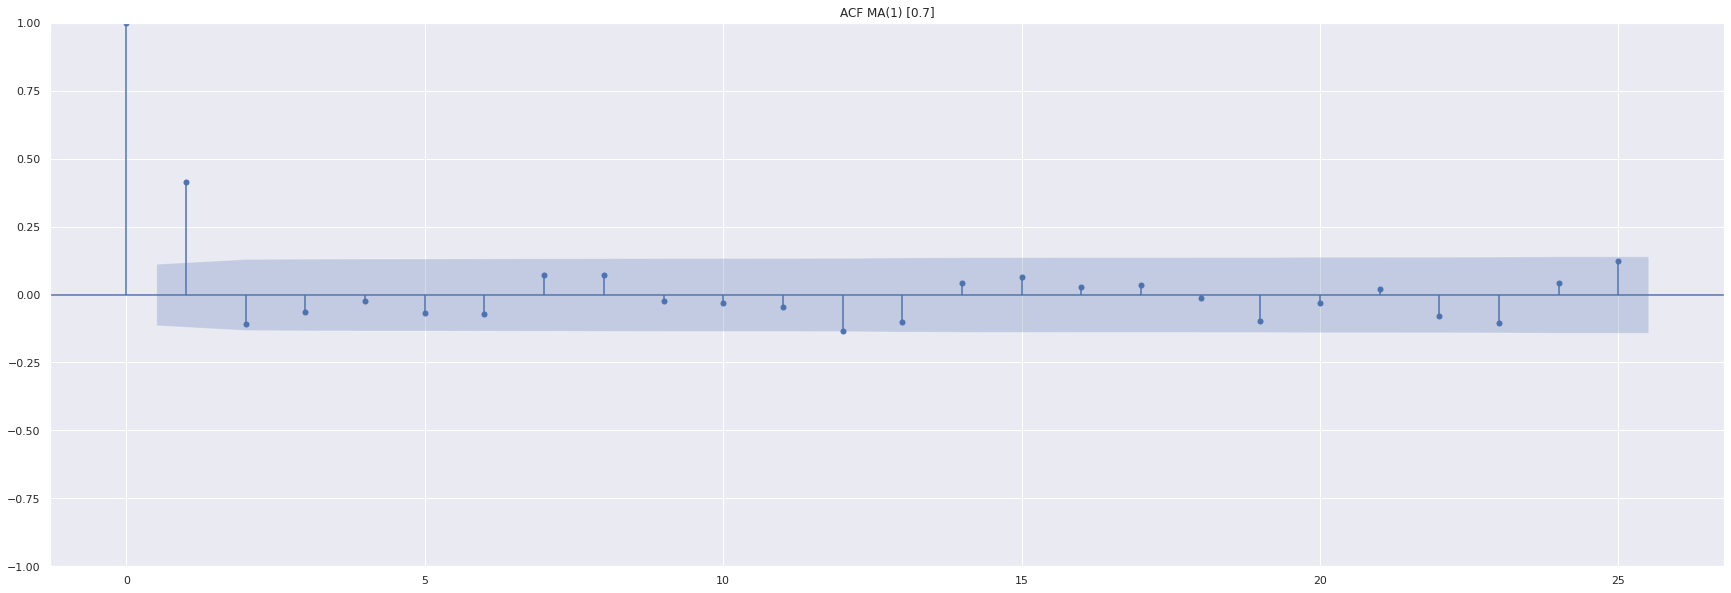

In [28]:
coefs = [0.7]
X = create_ma(1, coefs, 300)
print(pacf(X))
plt.plot(X)
plt.title(f"MA(1), {coefs}")
plot_pacf(X)
plt.title(f"PACF MA(1) {coefs}")
plt.show()
plot_acf(X)
plt.title(f"ACF MA(1) {coefs}")
plt.show()

1
[ 1.          0.64117772 -0.08958731 -0.11402479  0.00915026  0.07457225
 -0.03901446  0.03151861  0.05939473  0.00575319  0.05989763  0.02198
  0.05354145 -0.02087006  0.08294082 -0.05655693  0.11624247  0.09182519
 -0.07662708 -0.00713579  0.01317833  0.09487031 -0.05929153  0.13938257
 -0.09296698]


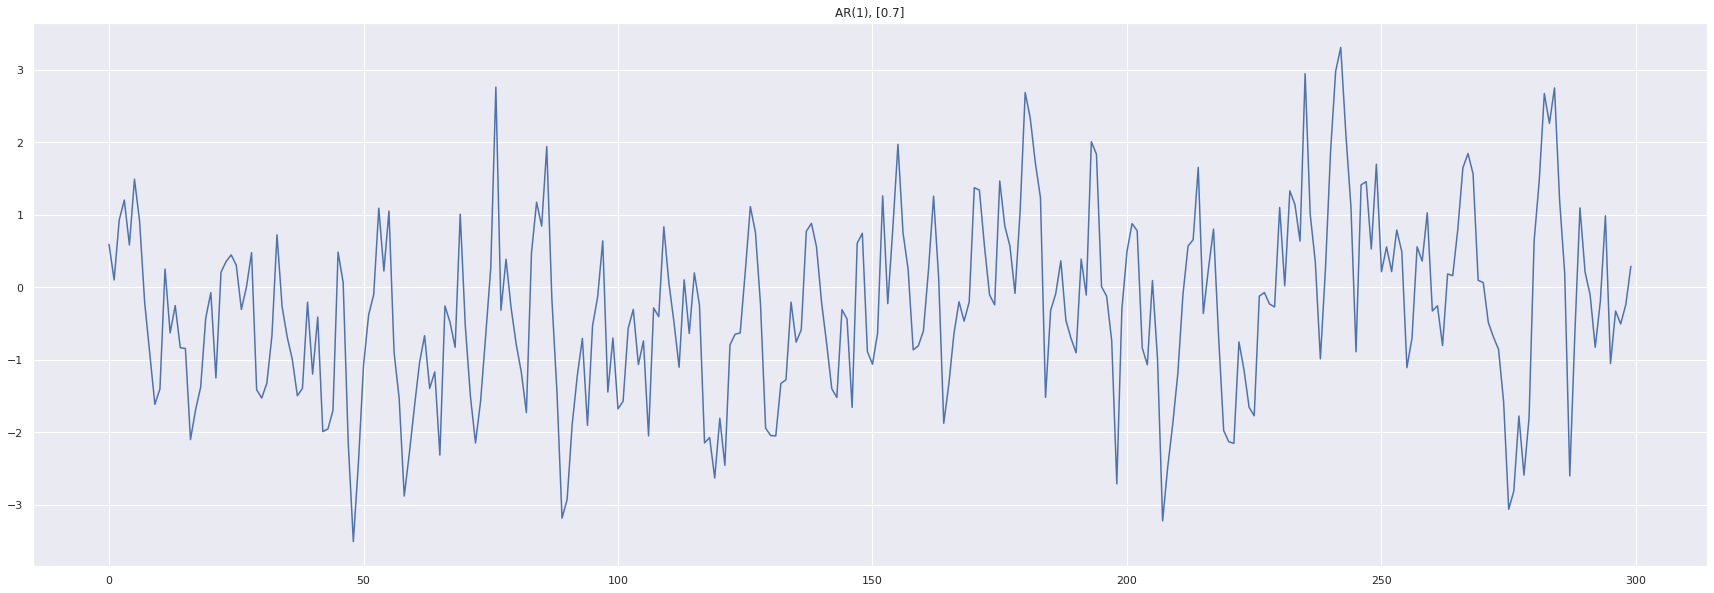

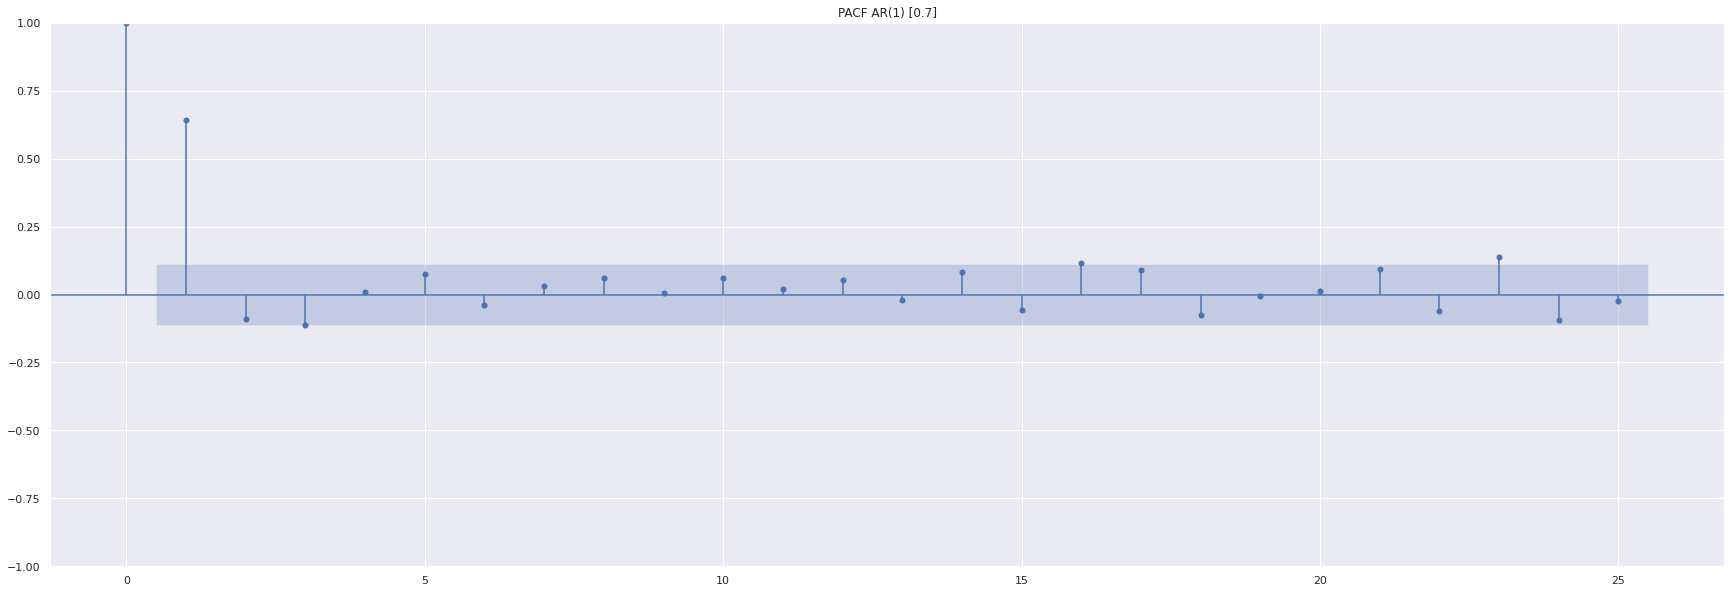

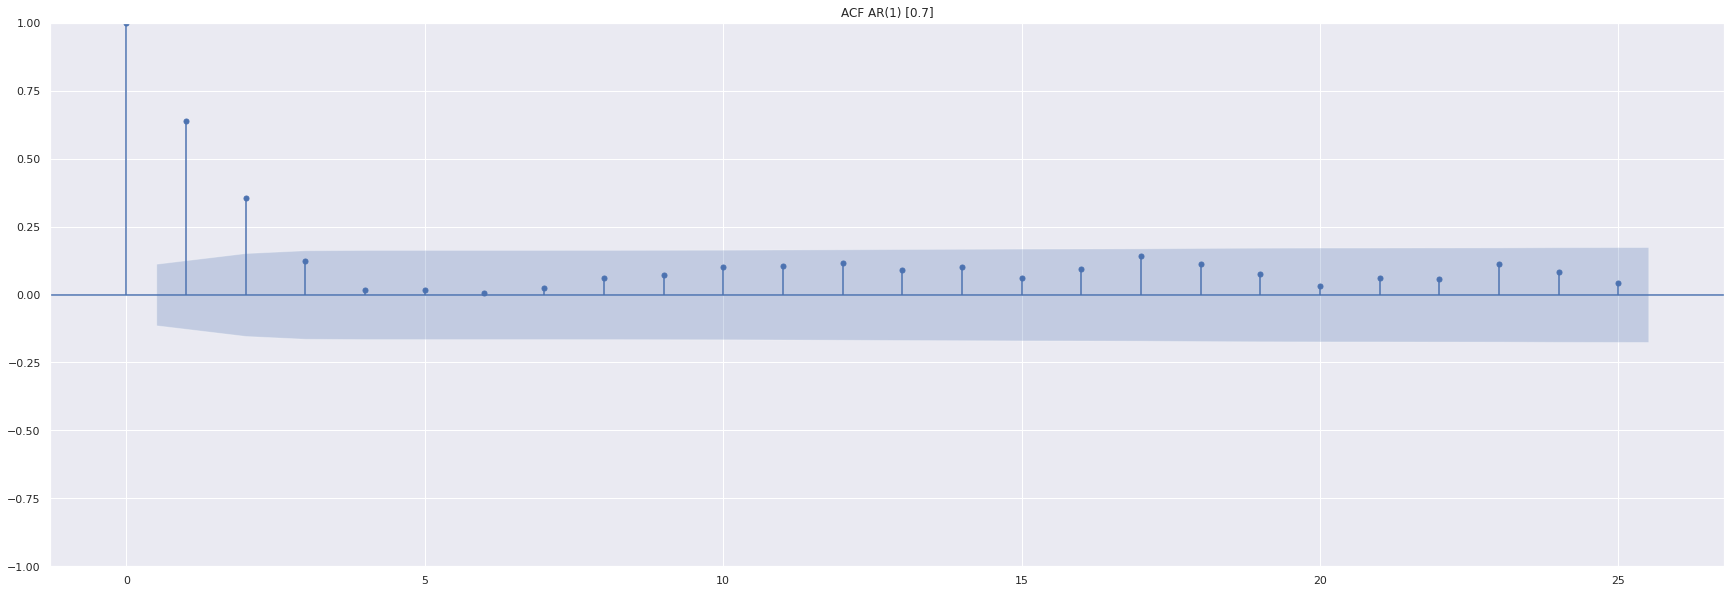

In [29]:
coefs = [0.7]
X = create_ar(1, coefs, 300)
print(pacf(X))
plt.plot(X)
plt.title(f"AR(1), {coefs}")
plot_pacf(X)
plt.title(f"PACF AR(1) {coefs}")
plt.show()
plot_acf(X)
plt.title(f"ACF AR(1) {coefs}")
plt.show()

In [30]:
X = create_ar(2, [0.99, 0.3], 2000)
print(X)
pacf(X)

2
[1.92588926e+000 1.47571259e-001 5.09987158e-001 ... 5.95629804e+181
 7.34565272e+181 9.05908561e+181]


/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1446: RuntimeWarning: overflow encountered in square
  r[0] = (x ** 2).sum() / n
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1448: RuntimeWarning: overflow encountered in multiply
  r[k] = (x[0:-k] * x[k:]).sum() / (n - k * adj_needed)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


array([ 1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])

In [31]:
phis = [0.4, 0.3]
thetas = [0.3, 0.3]
X = create_arma(p=2, q = 2, phis = [0.4, 0.3], thetas = [0.3, 0.3], time_points = 200)

Text(0.5, 1.0, 'ARMA(2,2), X_t = 0.4X_t-1 + 0.3X_t-2 + 0.3 W_t-1 + 0.3 W_t-2 + W_t')

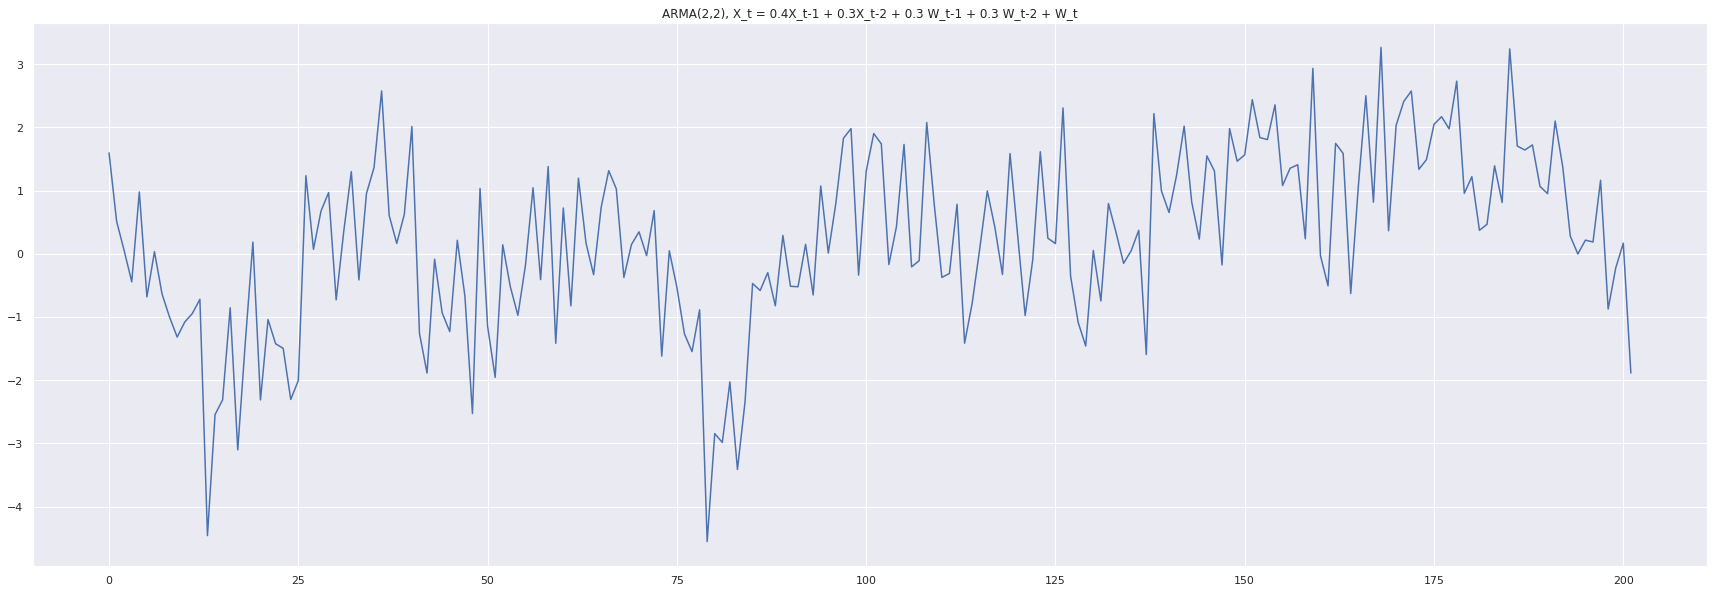

In [32]:
plt.plot(X)
plt.title(f"ARMA(2,2), X_t = 0.4X_t-1 + 0.3X_t-2 + 0.3 W_t-1 + 0.3 W_t-2 + W_t")

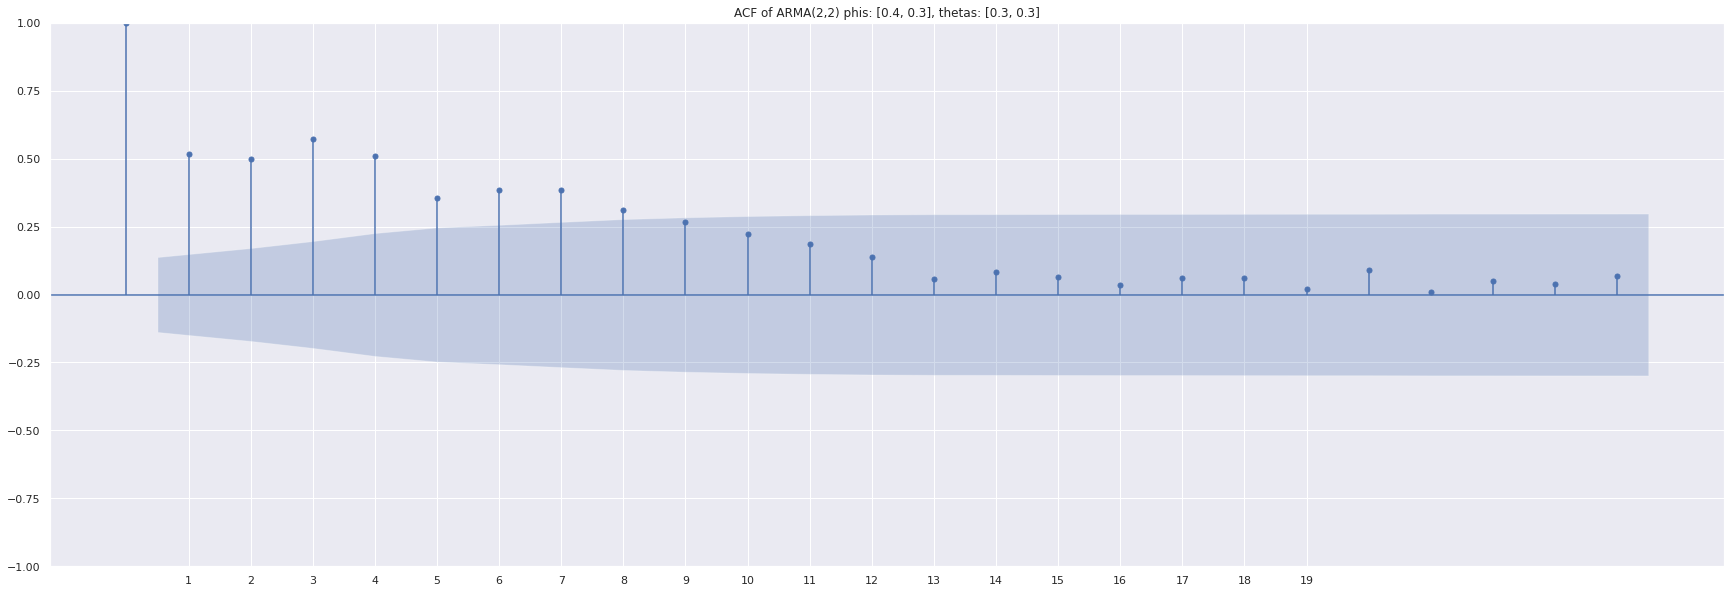

In [33]:
plot_acf(np.array(X))
plt.title(f"ACF of ARMA(2,2) phis: {phis}, thetas: {thetas}")
plt.xticks([i for i in range(1,20)])
plt.show()

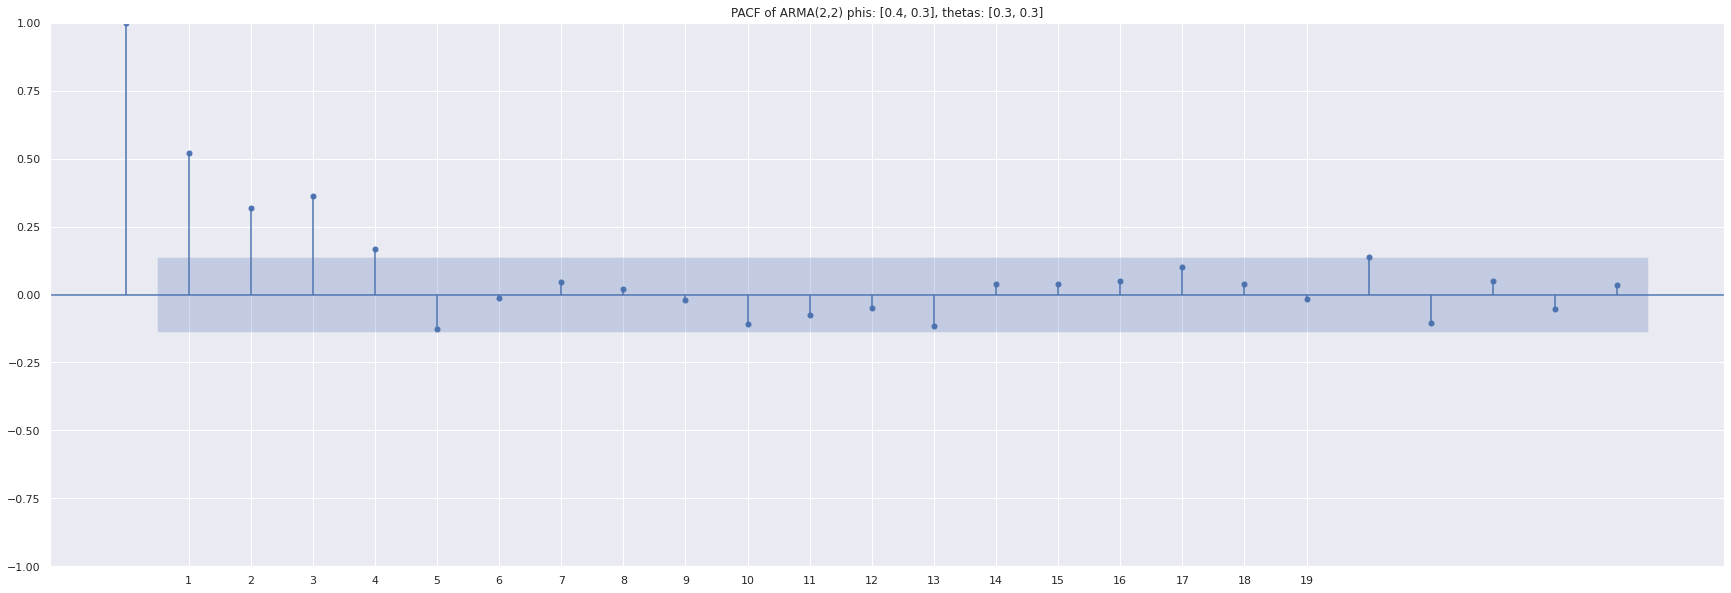

In [34]:
plot_pacf(np.array(X))
plt.title(f"PACF of ARMA(2,2) phis: {phis}, thetas: {thetas}")
plt.xticks([i for i in range(1,20)])
plt.show()

2
[ 1.          0.87791368 -0.0016174  -0.0018025  -0.00198929 -0.00217857
 -0.00236542 -0.00255273 -0.00274573 -0.00293829 -0.00313787 -0.00333819
 -0.00354058 -0.00375153 -0.00395965 -0.00418101 -0.0044031  -0.00463144
 -0.0048647  -0.00510797 -0.0053548 ]


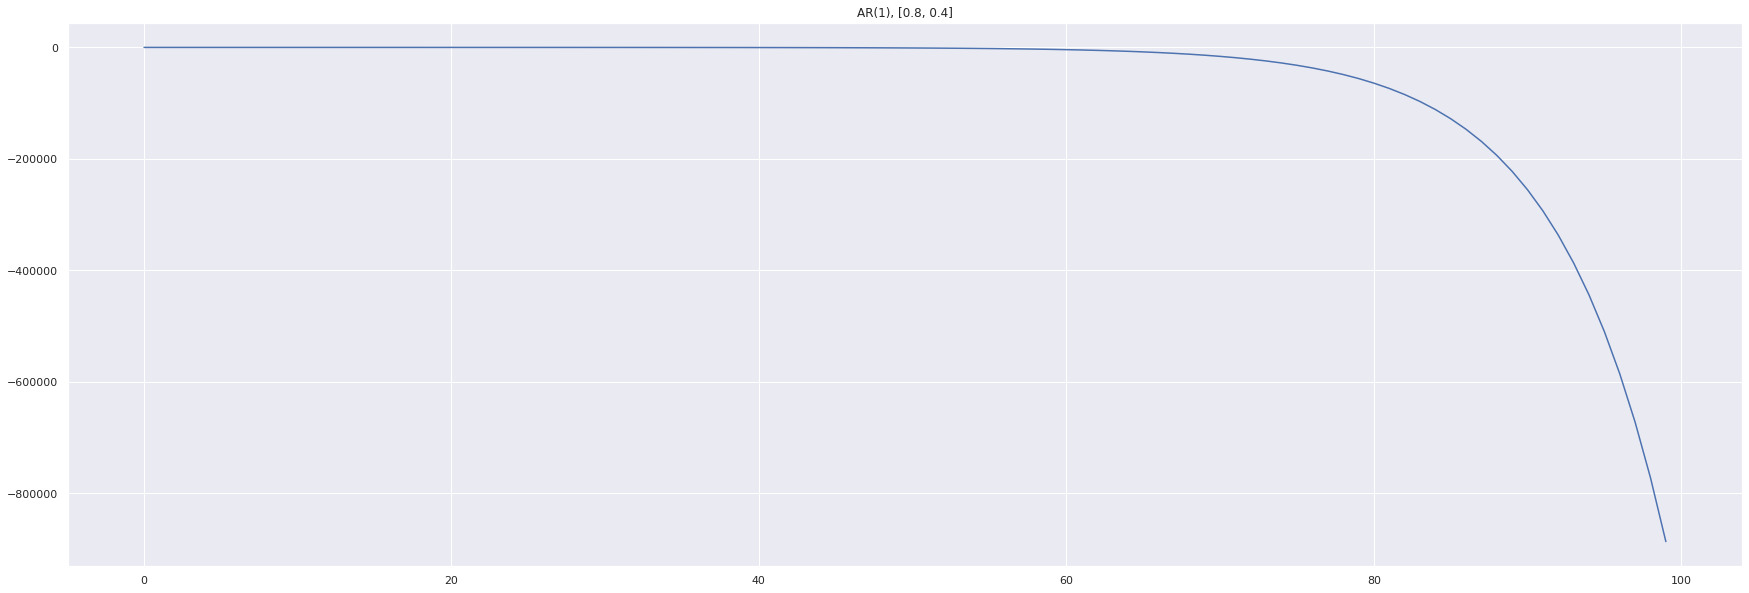

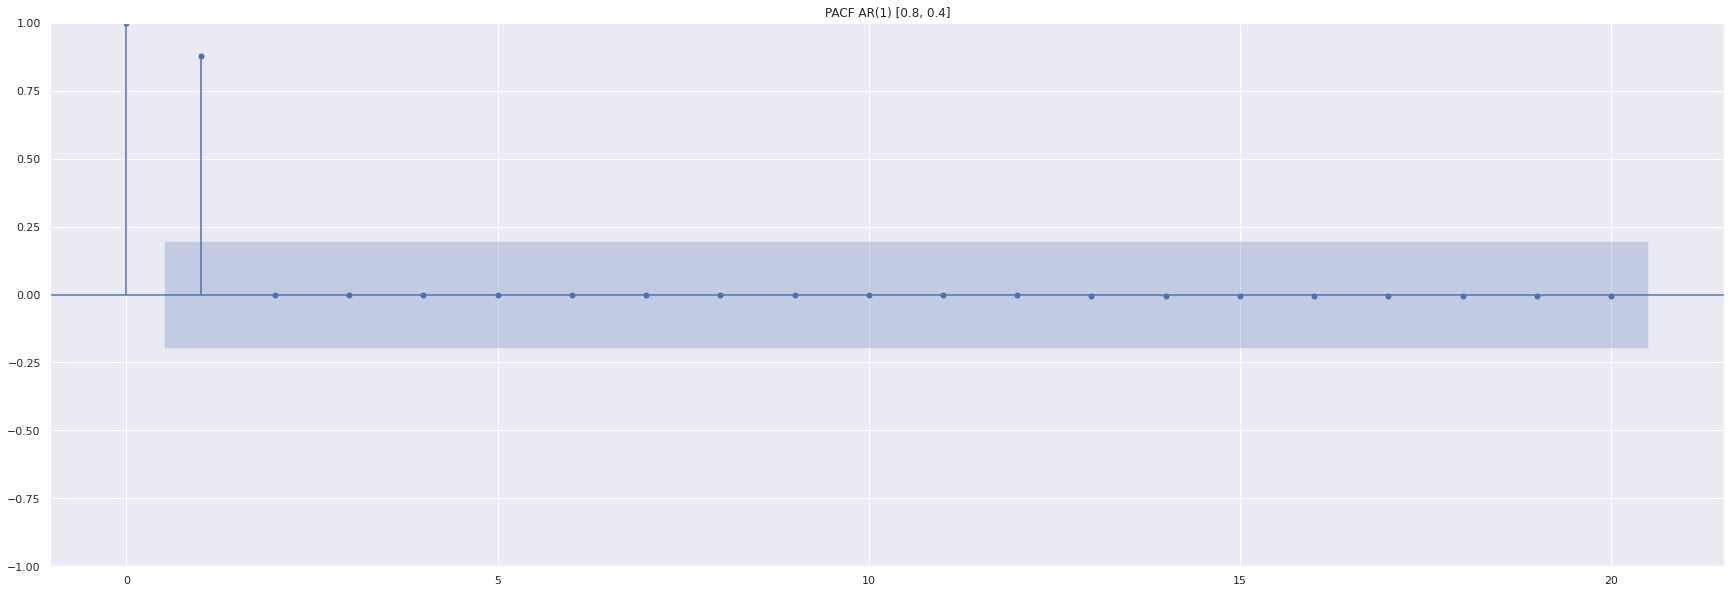

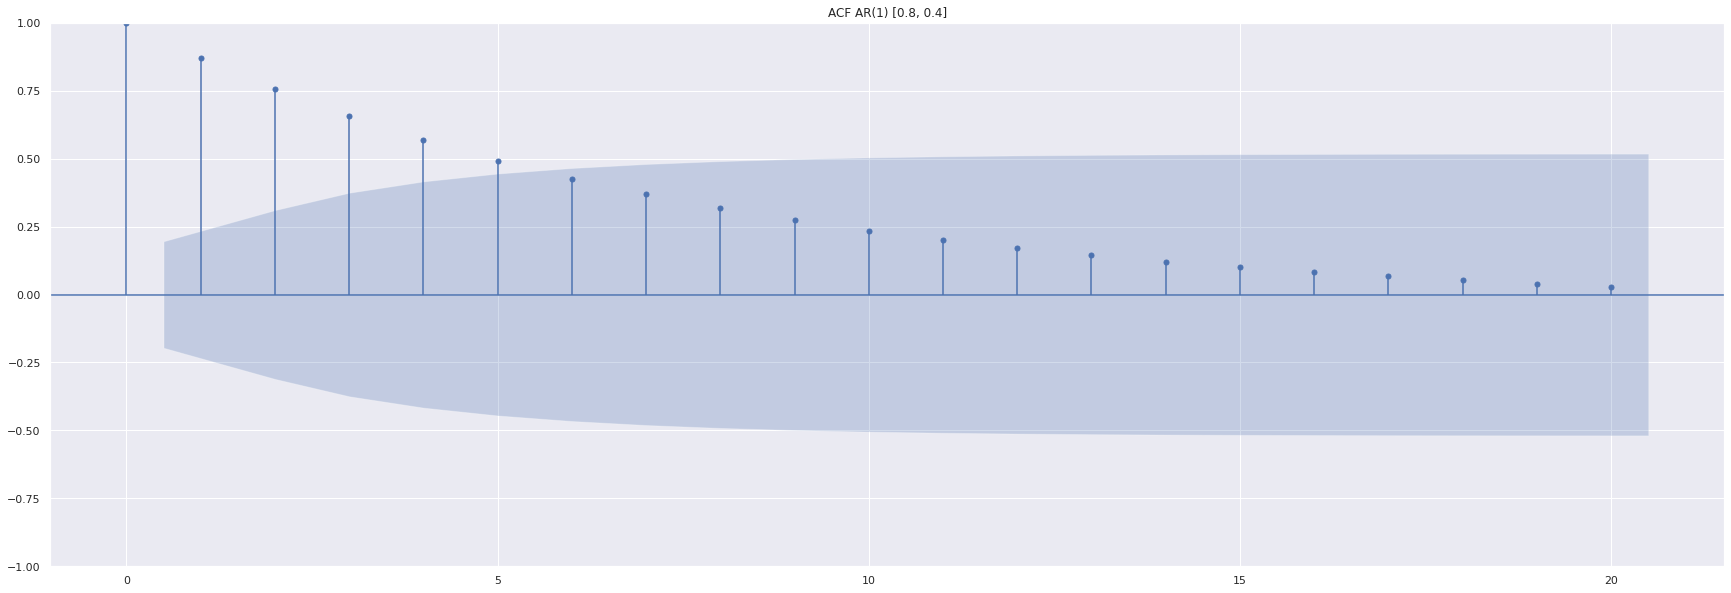

In [35]:
coefs = [0.8, 0.4]
X = create_ar(2, coefs, 100)
print(pacf(X))
plt.plot(X)
plt.title(f"AR(1), {coefs}")
plot_pacf(X)
plt.title(f"PACF AR(1) {coefs}")
plt.show()
plot_acf(X)
plt.title(f"ACF AR(1) {coefs}")
plt.show()

2
[ 1.          0.39771221 -0.07775477  0.01420693 -0.07356295 -0.0848416
  0.11357906 -0.1014399  -0.01481137 -0.01225806 -0.04653768  0.00470149
  0.00931928  0.02035469  0.05810059 -0.14905139 -0.04729978 -0.06079762
 -0.13962074 -0.20894931 -0.00419479]


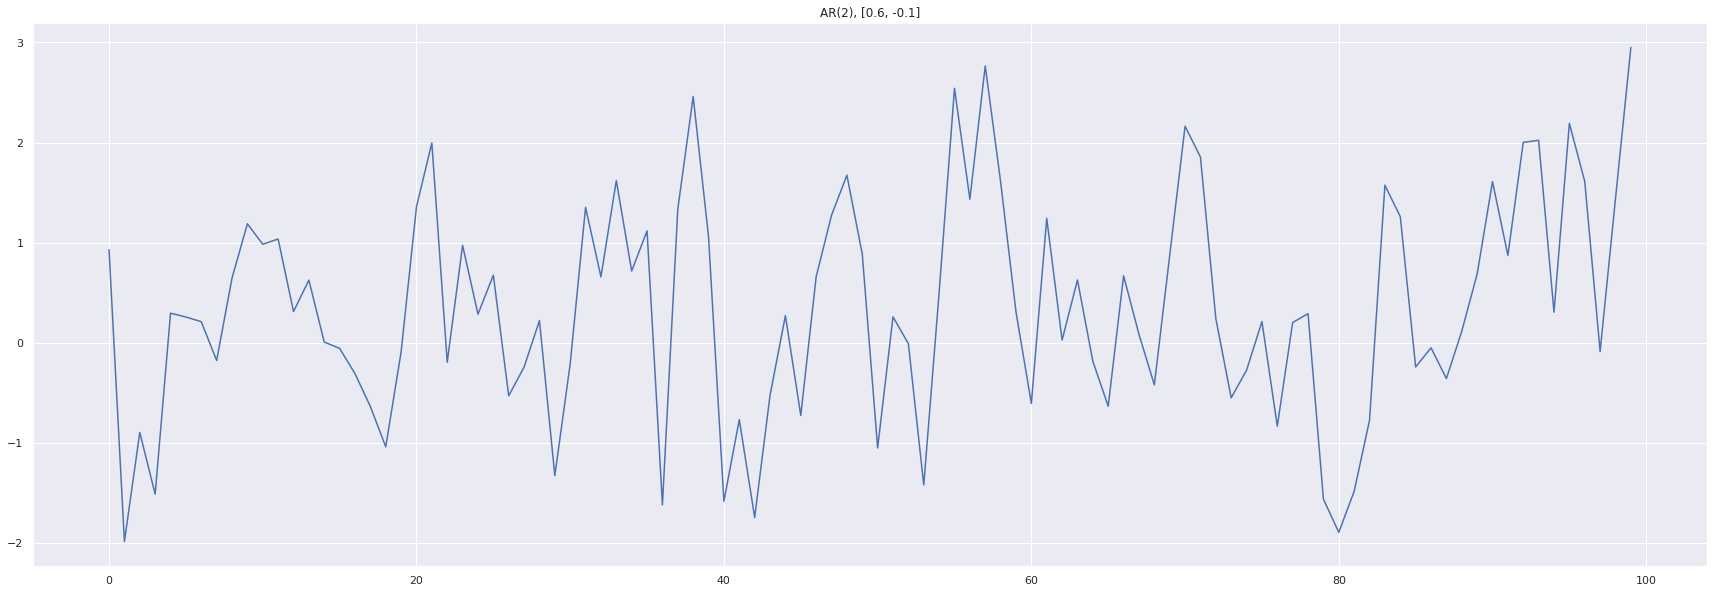

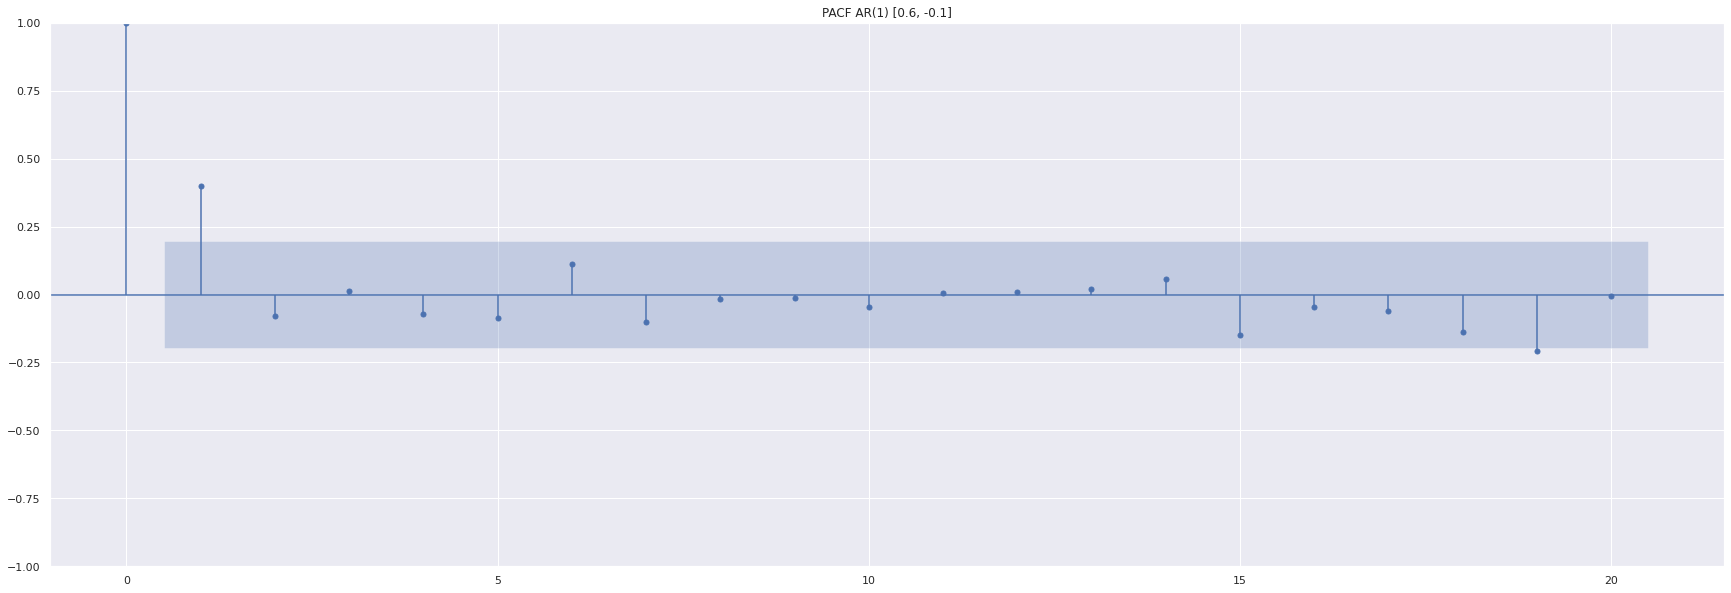

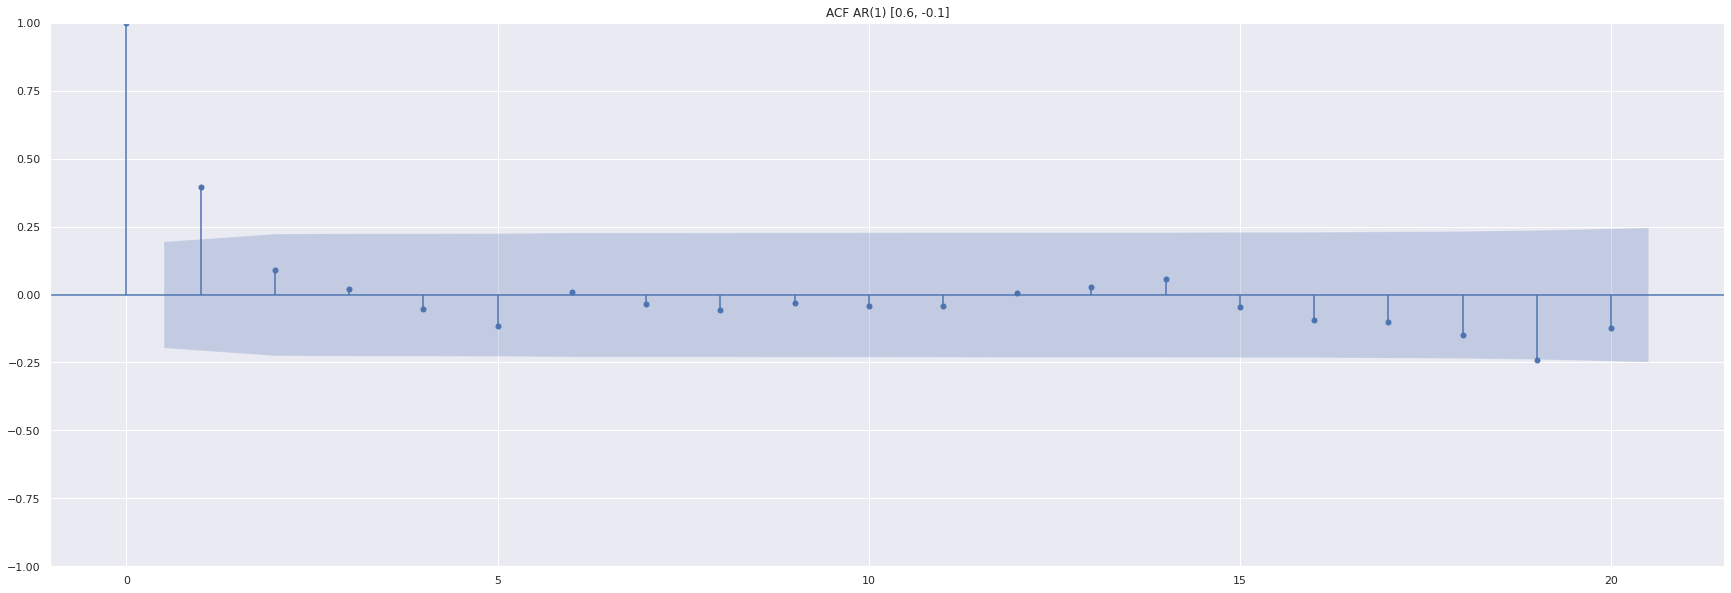

In [36]:
coefs = [0.6, -0.1]
X = create_ar(2, coefs, 100)
print(pacf(X))
plt.plot(X)
plt.title(f"AR(2), {coefs}")
plot_pacf(X)
plt.title(f"PACF AR(1) {coefs}")
plt.show()
plot_acf(X)
plt.title(f"ACF AR(1) {coefs}")
plt.show()

2
[ 1.         -0.62025722  0.84890136 -0.3119012   0.07414625 -0.24023552
 -0.13560894  0.0072979  -0.00863831  0.02924487 -0.00594527  0.02005184
  0.01539688 -0.0740983  -0.1818932  -0.06390372 -0.32277502  0.18351649
 -0.11910786 -0.16334939  0.22304868]


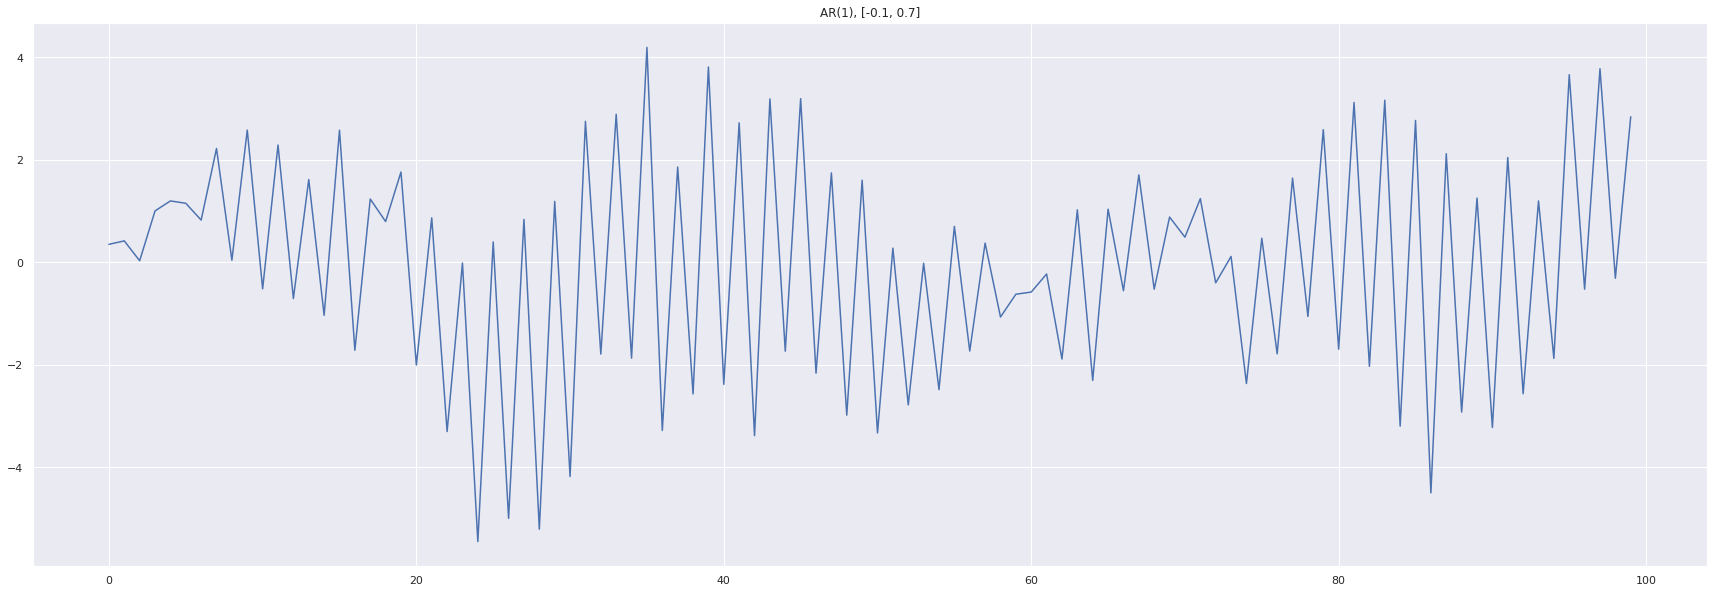

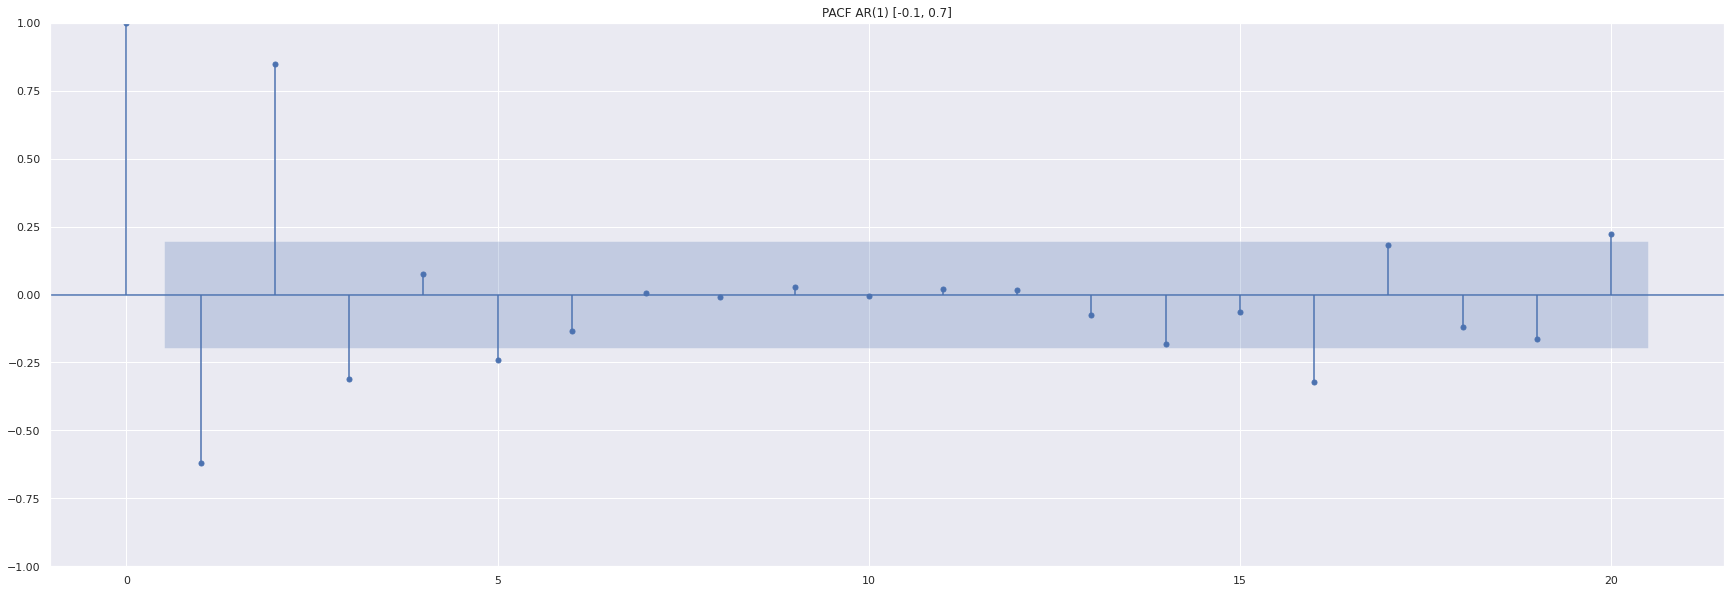

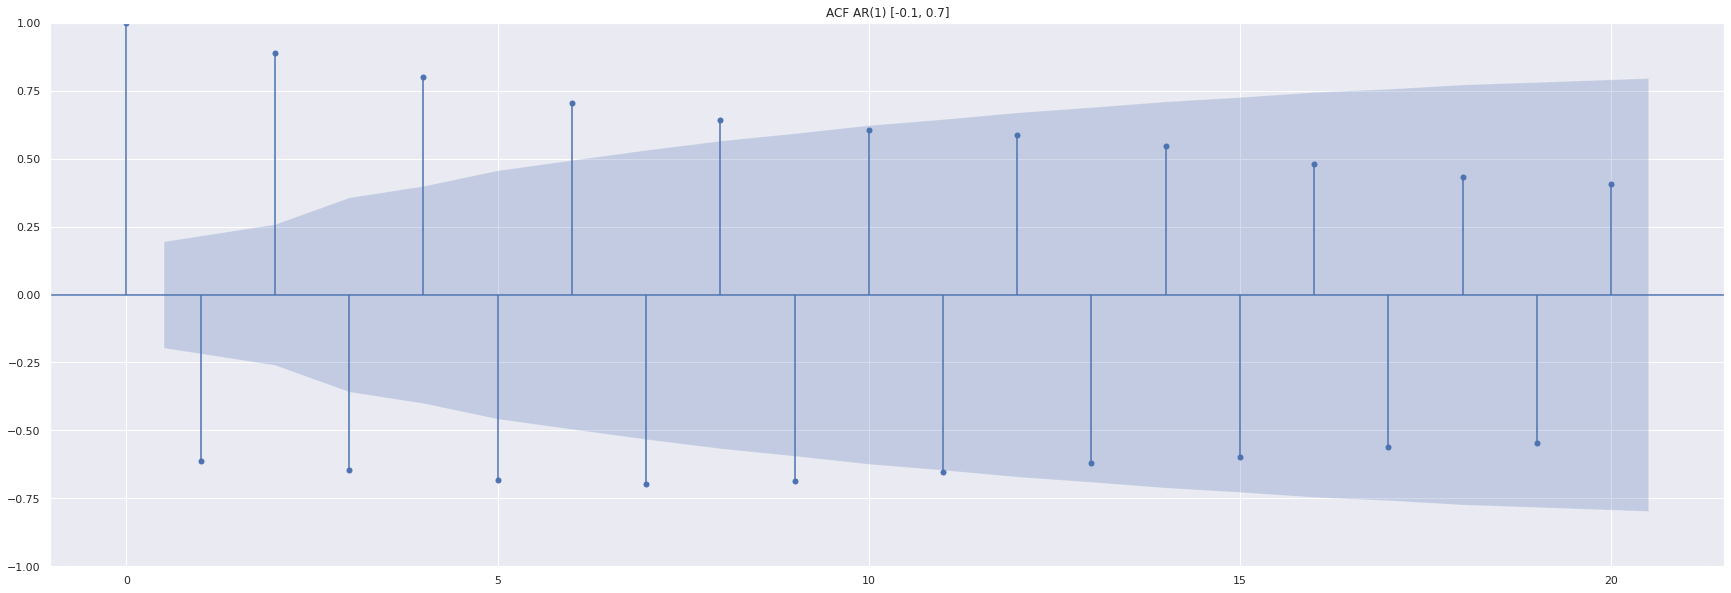

In [37]:
coefs = [-0.1, 0.7]
X = create_ar(2, coefs, 100)
print(pacf(X))
plt.plot(X)
plt.title(f"AR(1), {coefs}")
plot_pacf(X)
plt.title(f"PACF AR(1) {coefs}")
plt.show()
plot_acf(X)
plt.title(f"ACF AR(1) {coefs}")
plt.show()

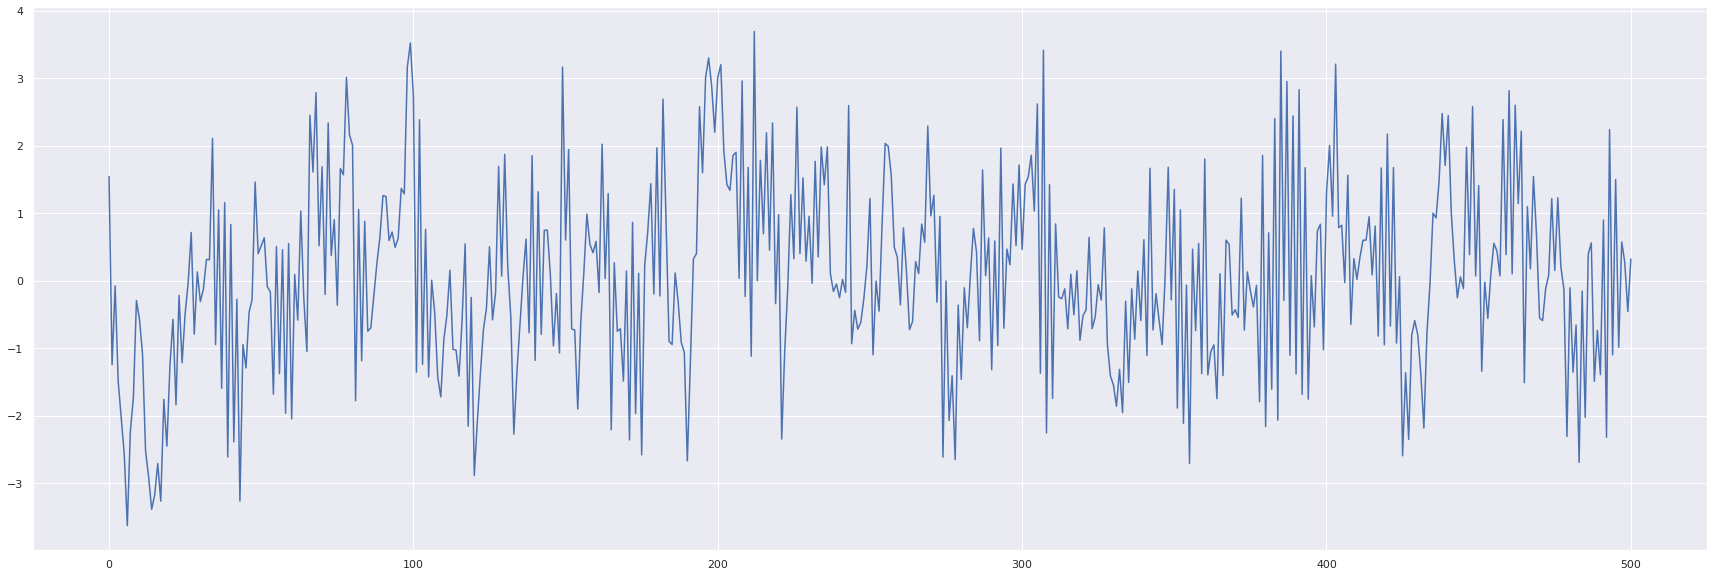

In [38]:
phis = [0.7]
thetas = [0.2]
X = create_arma(p=1, q = 1, phis = phis, thetas = thetas, time_points = 500)
plt.plot(X)
plt.show()

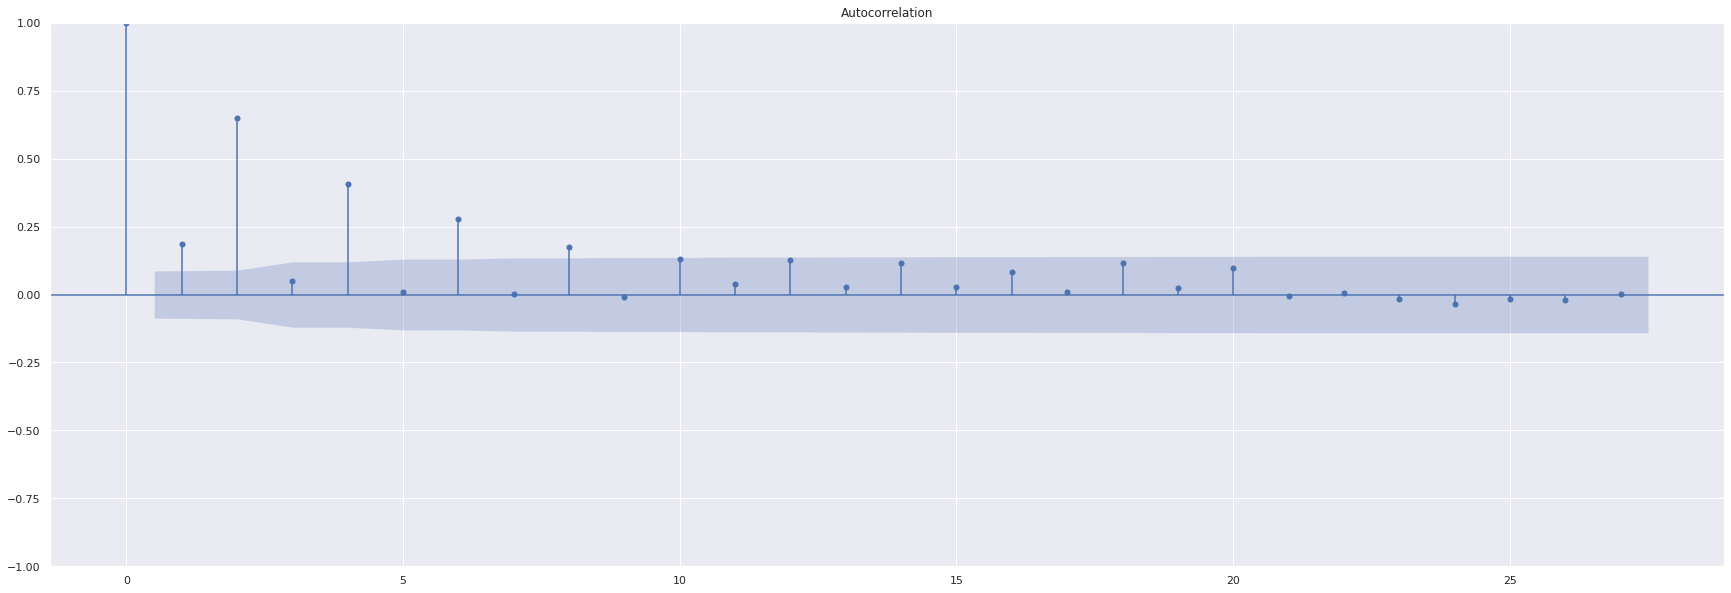

In [39]:
plot_acf(X)
plt.show()

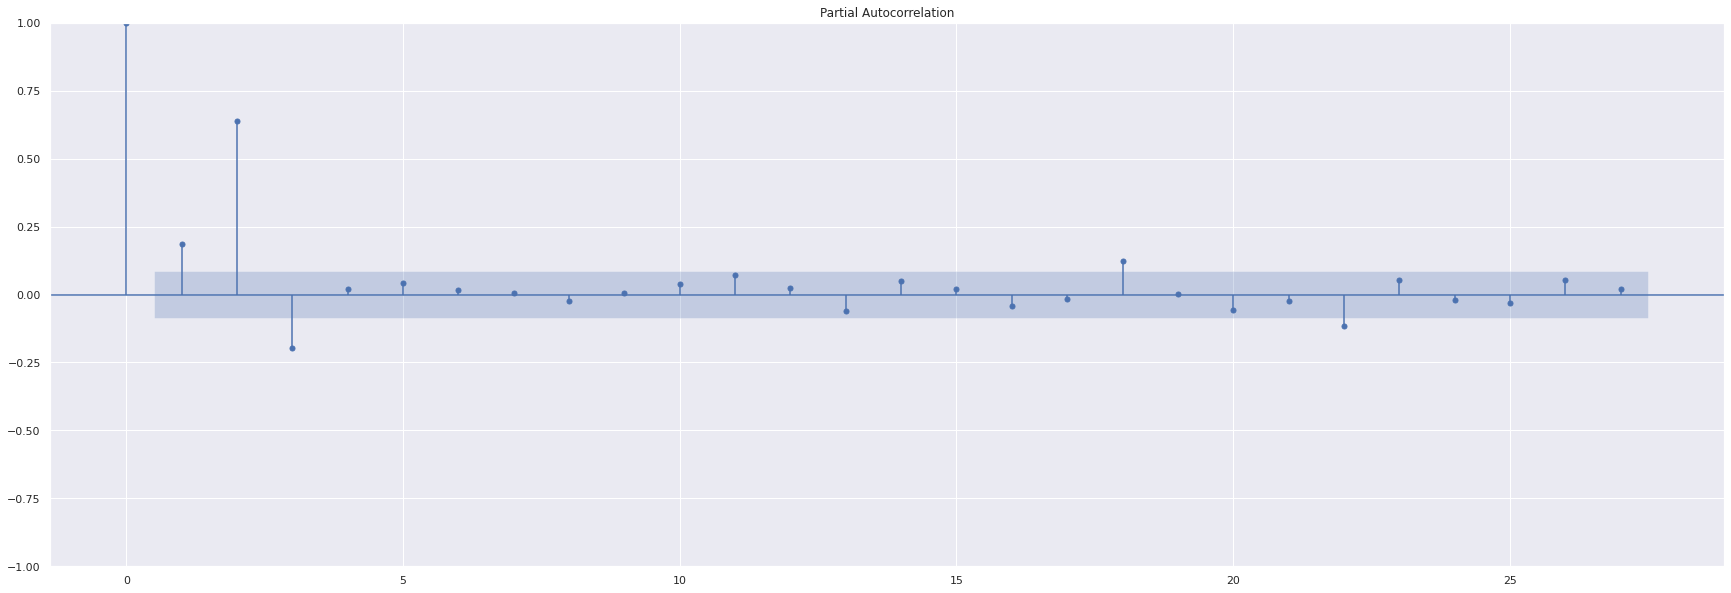

In [40]:
plot_pacf(X)
plt.show()